# STA 141B Data & Web Technologies for Data Analysis

### Lecture 17, 11/30/23, Visualizations for Classification

### Announcements

 - Final project: 8-10 pages including graphics, excluding code. Submit code as supplementary material as .ipynb or .py. 

### Last weeks's topics
- Static Visualizations
- Dynamic Visualizations
- Interactive Visualizations

### Today's topics
- Visualization for classification

### References

* Jakob Raymaekers & Peter J. Rousseeuw (2022): Silhouettes and Quasi Residual Plots for Neural
Nets and Tree-based Classifiers, Journal of Computational and
Graphical Statistics, 31:4, 1332-1343
* Jakob Raymaekers, Peter J. Rousseeuw & Mia Hubert (2022): Class maps for visualizing
classification results, Technometrics, 64 (2)

For convenience, today's code is in __R__. The data set `data_floralbuds` contains six features and a label with four levels: `bud`, `branch`, `scales` and `support`. 

In [1]:
library("classmap")

In [2]:
head(data_floralbuds, 3)

,X1,X2,X3,X4,X5,X6,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.5453697,0.2610724,0.6136361,0.4328999,0.2550885,0.2414354,bud
2,0.3717696,0.1742708,0.3964505,0.2923232,0.1521934,0.1352028,bud
3,0.4248221,0.2166471,0.4580404,0.3396556,0.1894749,0.1877862,bud


In [3]:
summary(data_floralbuds)

       X1               X2                X3               X4         
 Min.   :0.1276   Min.   :0.03815   Min.   :0.1230   Min.   :0.09892  
 1st Qu.:0.4218   1st Qu.:0.14547   1st Qu.:0.3681   1st Qu.:0.32430  
 Median :0.5387   Median :0.22098   Median :0.5020   Median :0.41396  
 Mean   :0.5459   Mean   :0.21932   Mean   :0.5058   Mean   :0.42248  
 3rd Qu.:0.6471   3rd Qu.:0.28048   3rd Qu.:0.6336   3rd Qu.:0.50843  
 Max.   :1.2324   Max.   :0.50318   Max.   :1.0678   Max.   :0.95761  
       X5                X6                y      
 Min.   :0.04583   Min.   :0.04328   branch : 49  
 1st Qu.:0.15366   1st Qu.:0.16578   bud    :363  
 Median :0.21011   Median :0.21784   scales : 94  
 Mean   :0.21666   Mean   :0.23053   support: 44  
 3rd Qu.:0.27214   3rd Qu.:0.28405                
 Max.   :0.52413   Max.   :0.58559                

We are interested in classifying the observations. 

In [4]:
require("MASS")

Loading required package: MASS



In [5]:
fit <- lda(y~., data=data_floralbuds) #linear discriminant analysis
yhat <- predict(fit)

In [6]:
head(yhat$posterior, 3)

,branch,bud,scales,support
1,6.980647e-06,0.9999806,1.447887e-12,1.244538e-05
2,1.227731e-03,0.9986119,2.480887e-09,1.603817e-04
3,6.906130e-04,0.9988797,3.455099e-09,4.297221e-04


Either explicitly or implicitly, most classifiers provide posterior probabilities (cf. the latent dirichlet allocation). 

In [7]:
head(yhat$class)

[1] bud bud bud bud bud bud
Levels: branch bud scales support

In [8]:
caret::confusionMatrix(yhat$class, data_floralbuds$y)$table

          Reference
Prediction branch bud scales support
   branch      45   2      8       8
   bud          2 356      0       5
   scales       0   0     85       0
   support      2   5      1      31

In [9]:
require(viridis)
vcrout <- vcr.da.train(data_floralbuds[,-7], data_floralbuds$y) #lda in in classmap

Loading required package: viridis

Loading required package: viridisLite



In [10]:
options(repr.plot.width=24, repr.plot.height=12)

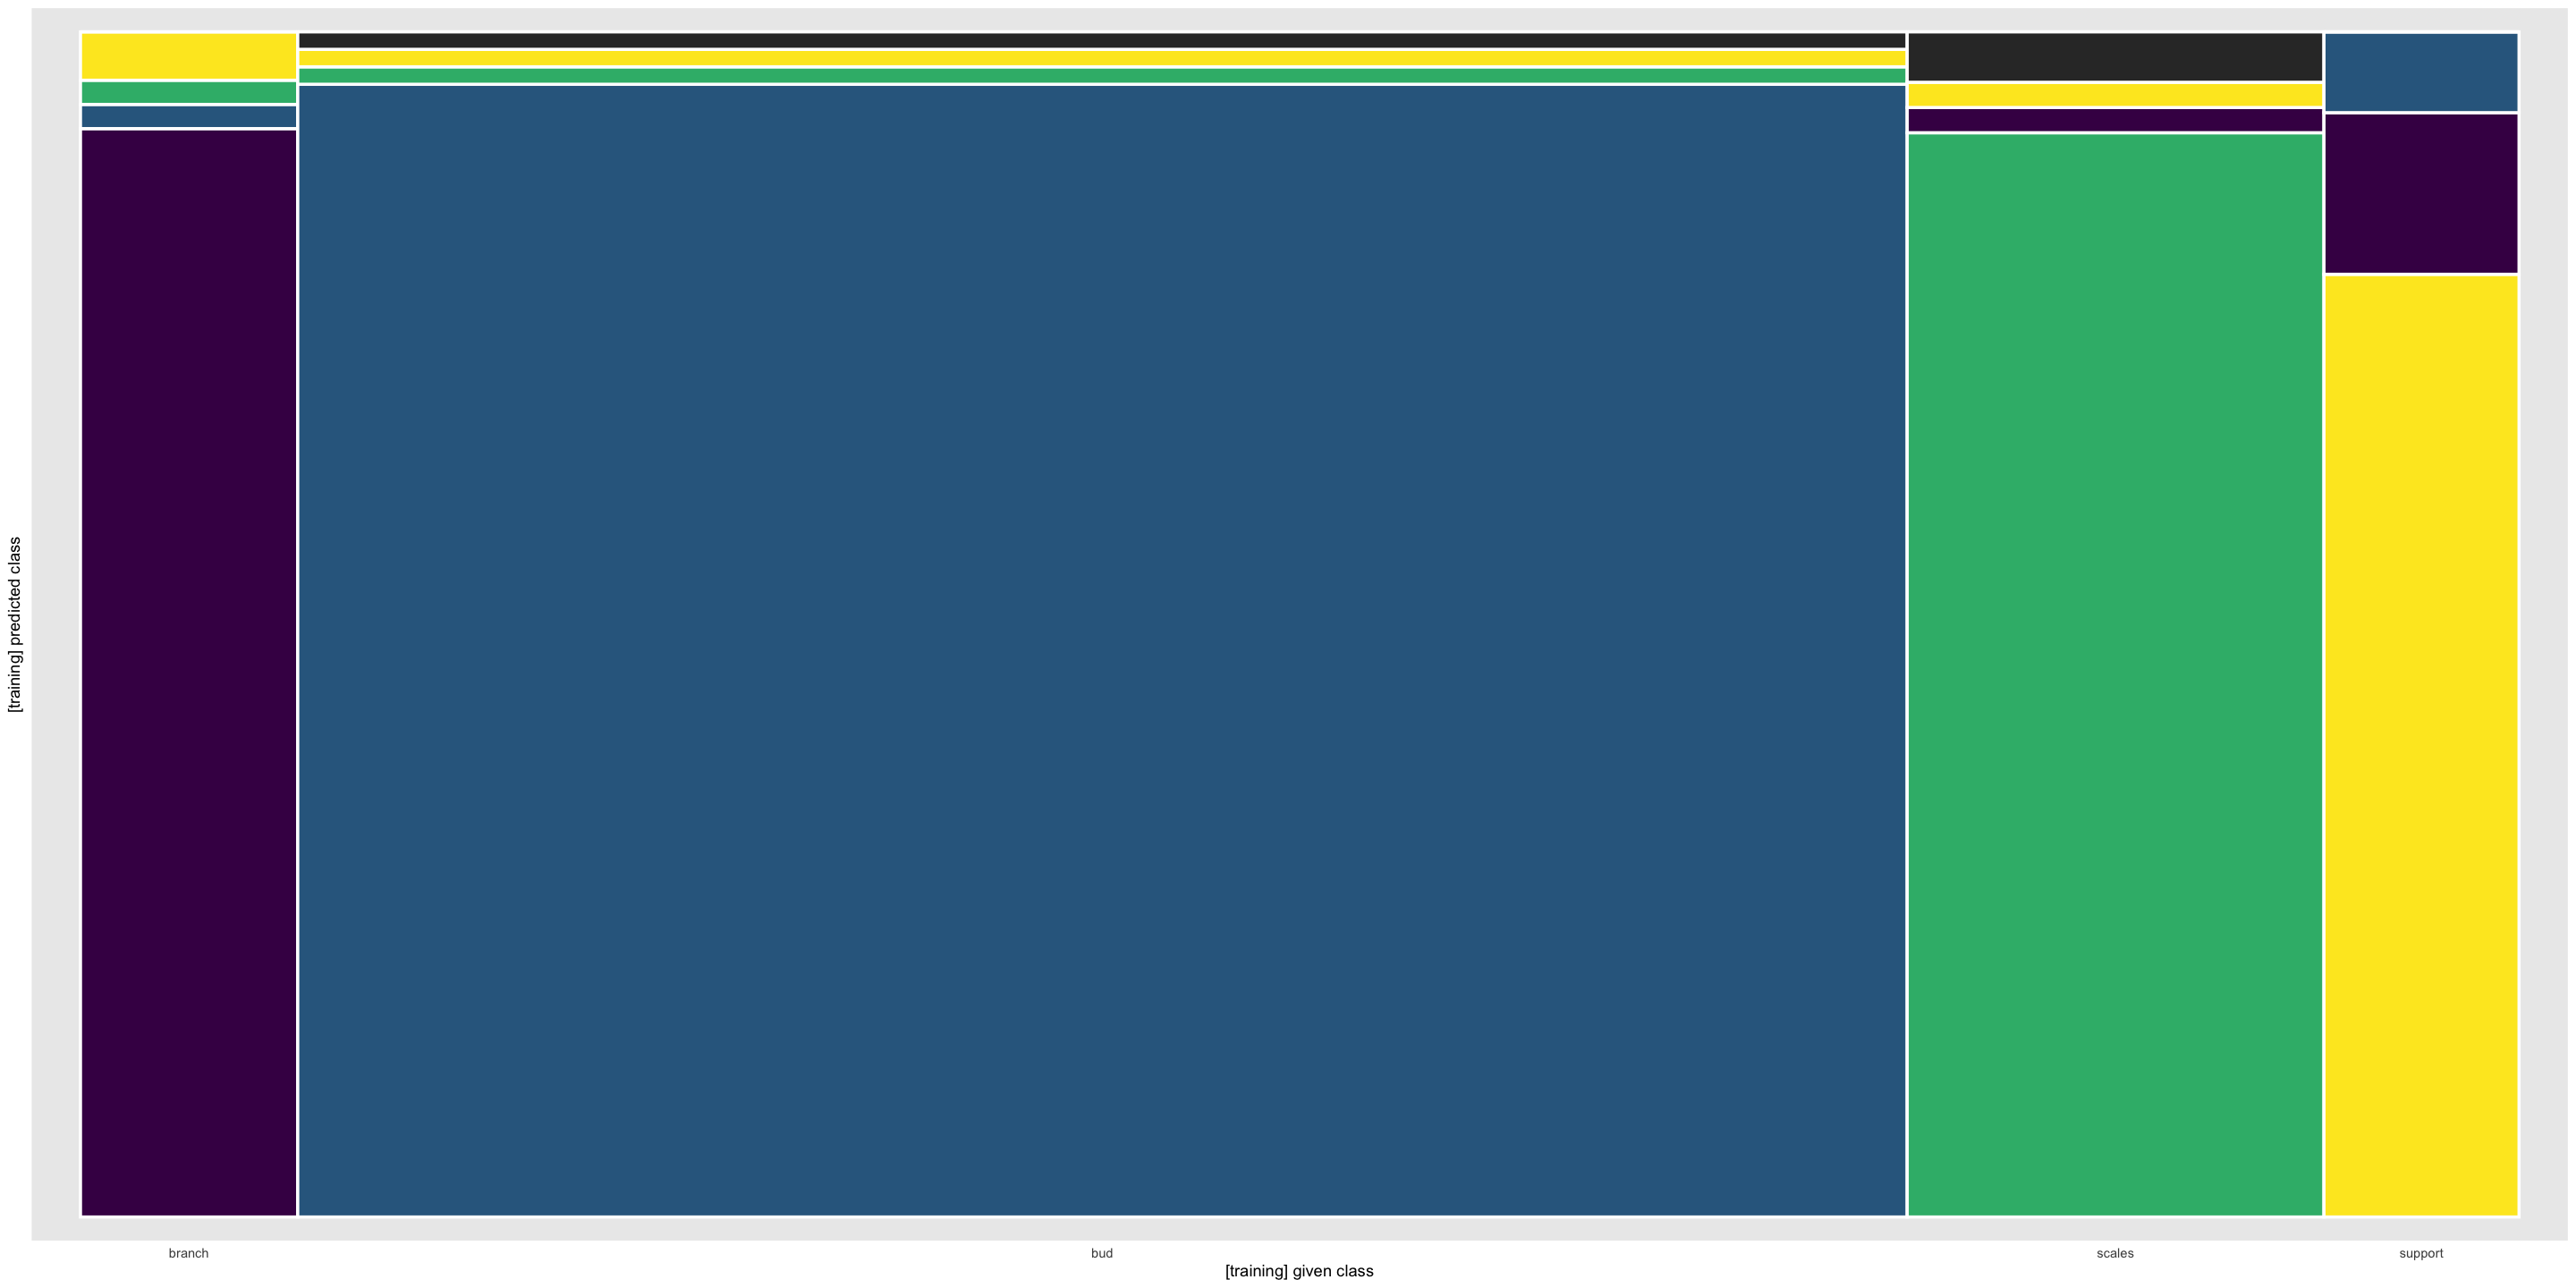

In [11]:
stackedplot(vcrout, classCols=viridis::viridis(4))

Suppose we have objects denoted by their index $i$ where $i = 1, \dots, n$, and there are classes
(labels, groups) $g$ with $g = 1, ..., G$. The target is thus a discrete variable with $G$ levels.
Consider a case $i$ in the training set or a test set. 

Denote the posterior probabilities $\hat{p}(i, g)$ of object $i$ belonging to each of the classes $g$, with
$\sum_{g}\hat{p}(i, g) = 1$ for each $i$. 

Now assume that object $i$ has a known given label $g_i$. We wish to measure to what extent
the given label $g_i$ agrees with the classiffcation. For this purpose we denote the highest
$\hat{p}(i, g)$ attained by a class different from $g_i$ as
$$\tilde{p}(i) = max_g\{\hat{p}(i, g); g \neq g_i\}$$
The class attaining this maximum can be seen as the best alternative class. 
If $\hat{p}(i, g_i) > \tilde{p}(i)$ it follows that $g_i$ attains the overall highest value of $\hat{p}(i, g)$ 
so the classiffer agrees with the
given class $g_i$. 
On the other hand, if $\hat{p}(i, g_i) < \tilde{p}(i)$ the classiffer will not assign object $i$ to
class $g_i$.

We now compute the conditional posterior *probability of the best alternative class* when
comparing it with the given class $g_i$ as
$$
PAC(i) 
= 
\frac{\tilde{p}(i)}{\hat{p}(i, g_i) + \tilde{p}(i)}
$$

We will produce a silhouette plot to visualize the classification. For each $i$, the silhouette width is defined as 
$$
s(i) = 1 - 2PAC(i).
$$
$s(i)$ ranges from $−1$ to $1$, with high values
reflecting that the given class of case $i$ fits very well, and negative
values indicating that the given class fits less well than the best
alternative class.

 classNumber classLabel classSize classAveSi
           1     branch        49       0.75
           2        bud       363       0.96
           3     scales        94       0.93
           4    support        44       0.57


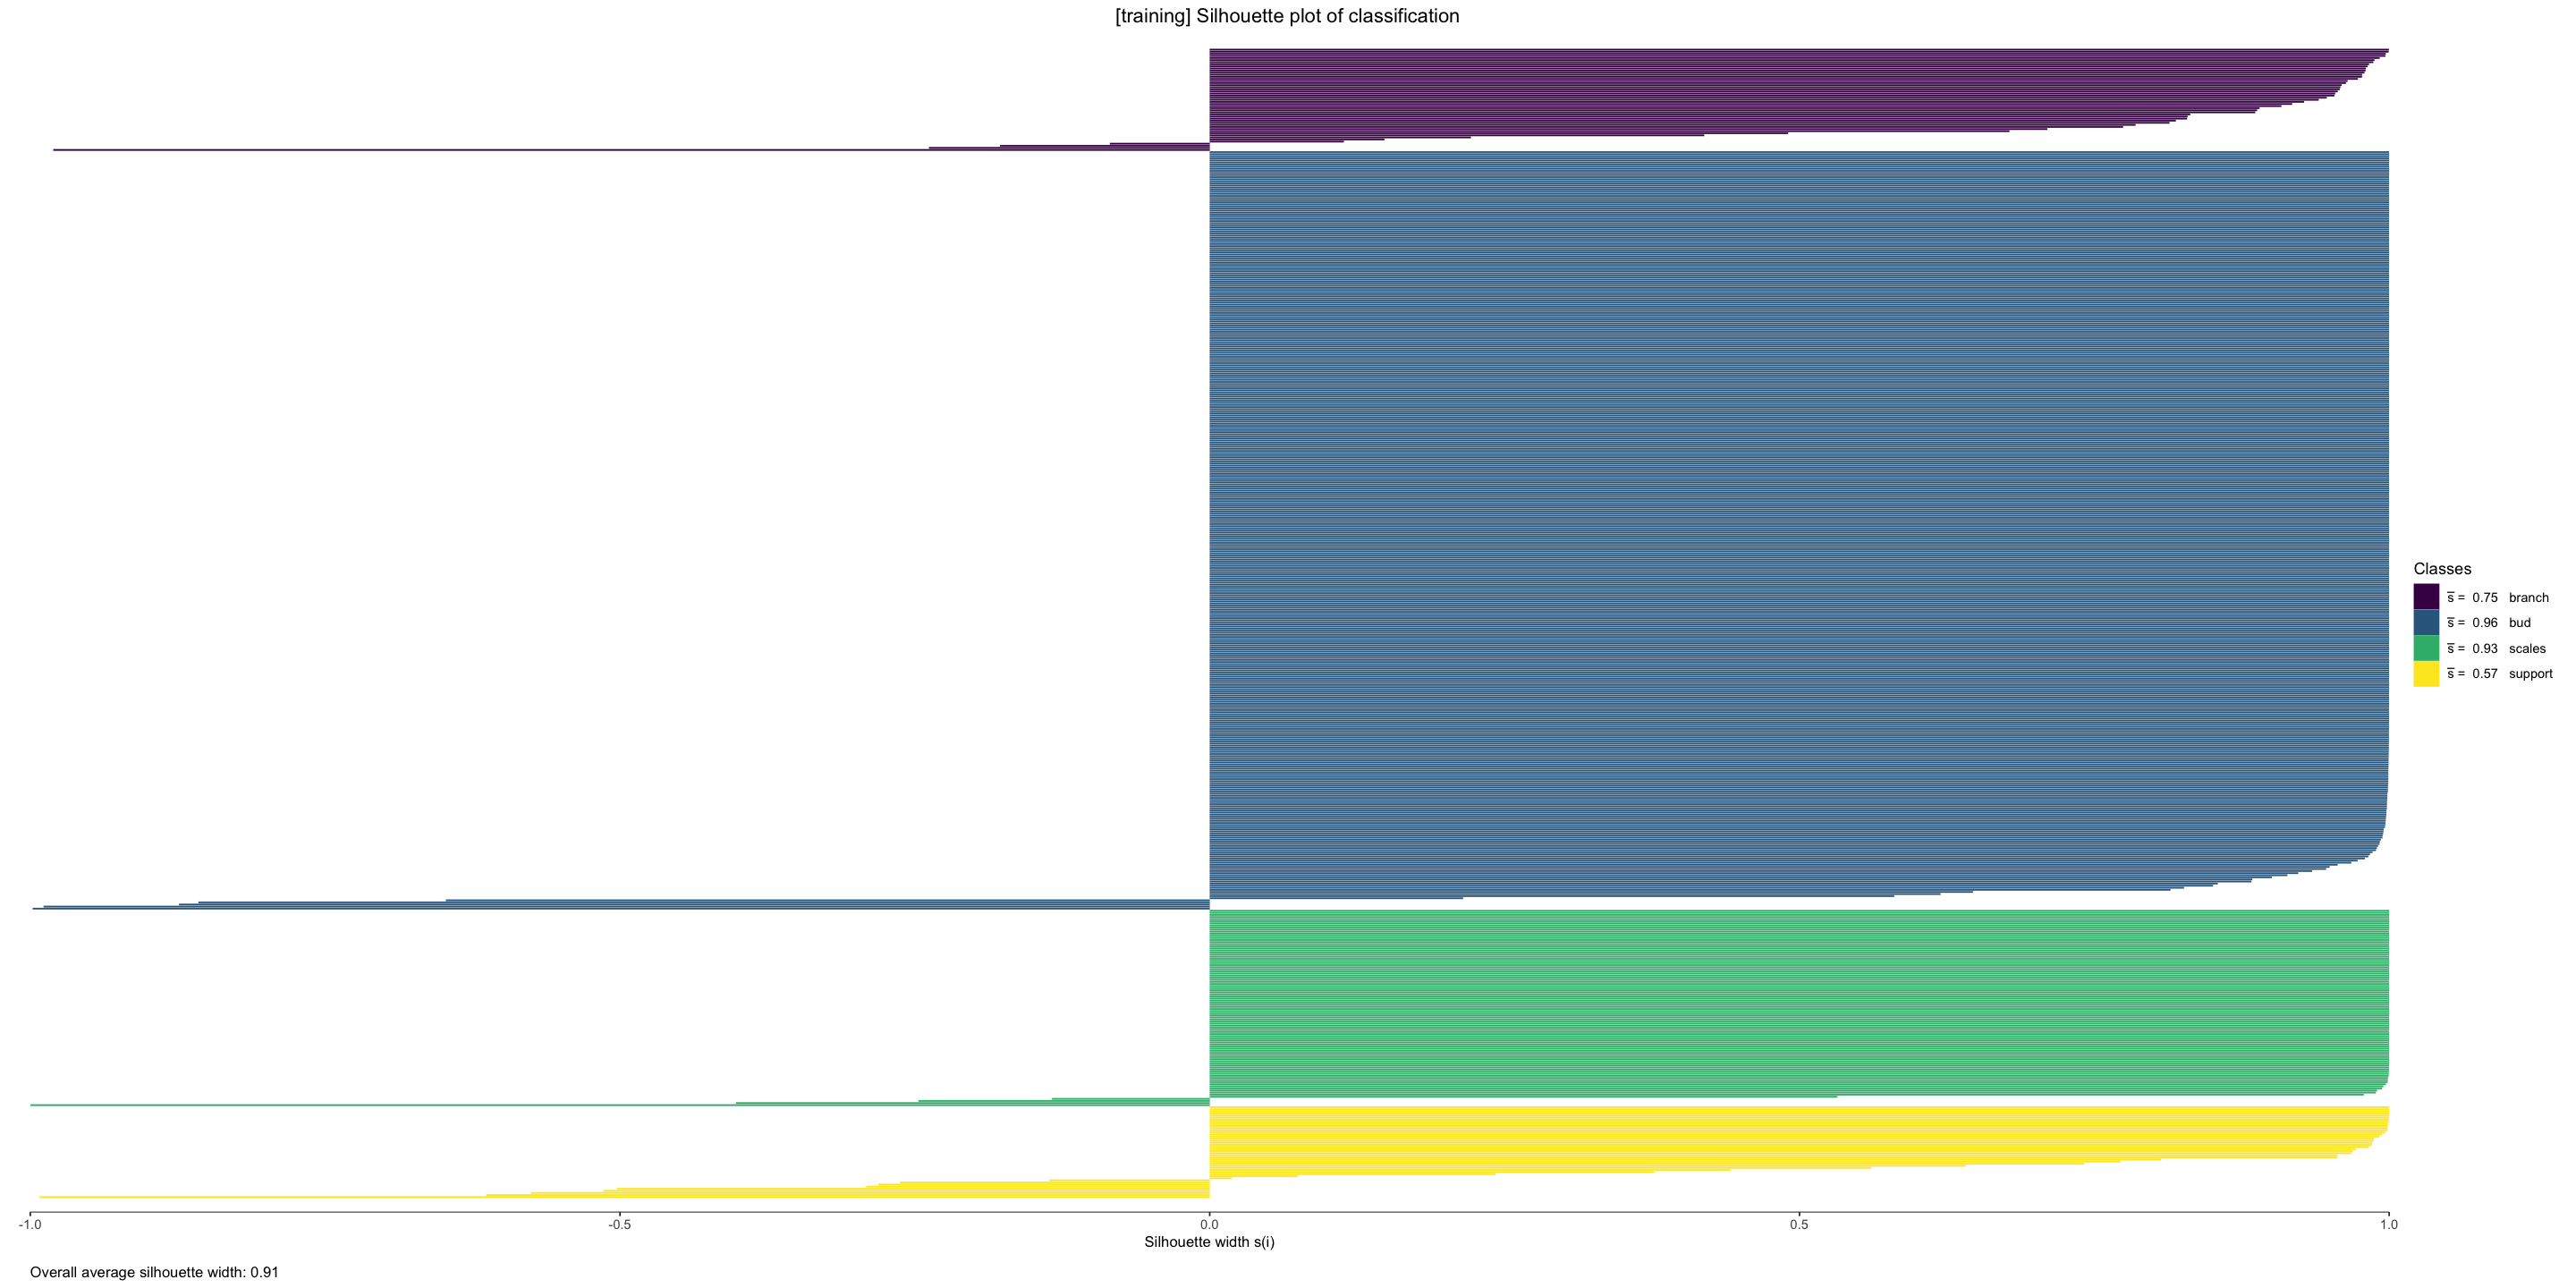

In [12]:
silplot(vcrout, classCols=viridis::viridis(4))

Another graphical display is obtained by plotting the PAC versus
a relevant data variable. This is not unlike plotting the absolute
residuals in regression, since small values of $PAC(i)$ indicate
that the model fits the data point nearly perfectly, whereas a
high $PAC(i)$ alerts us to a poorly fitted data point.

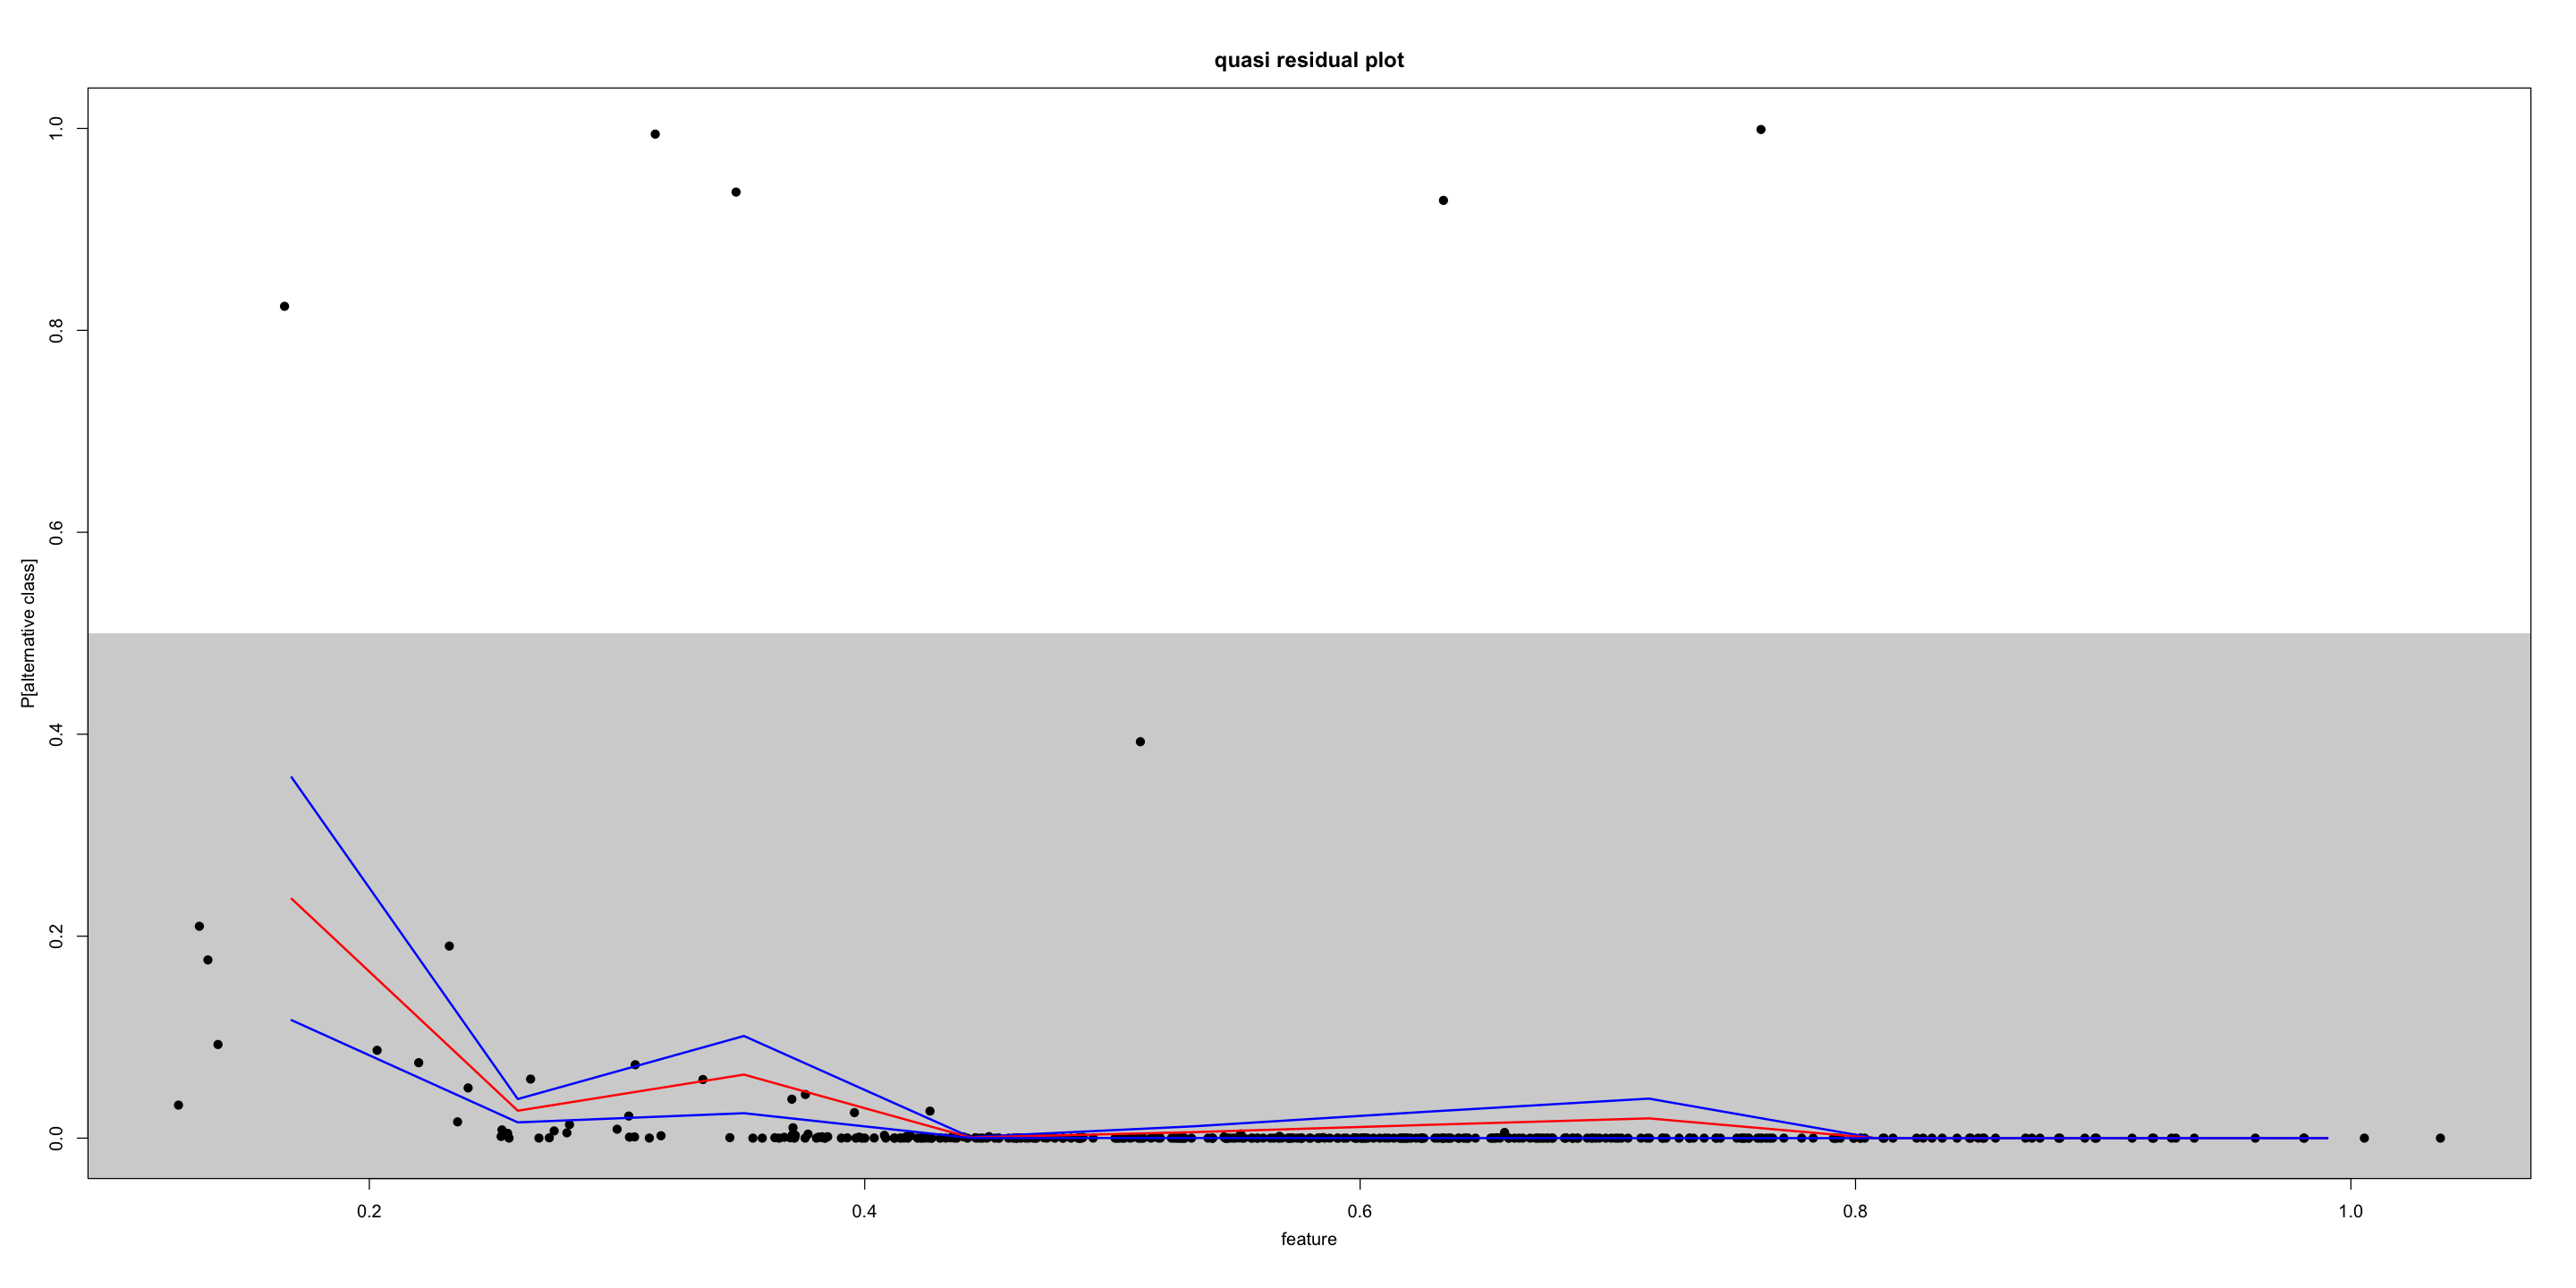

In [13]:
label = 'bud' # bud, branch, scales, support
PAC <- vcrout$PAC[vcrout$y==label] 
feat <- data_floralbuds[vcrout$y==label,3] # feature does not have to be part of the classification
qresplot(PAC, feat, plotErrorBars = TRUE)

The data feature on the x-axis does not have to be part of the classification
model, and it could also be a quantity derived from the data
features such as a principal component score or a prediction,
or just the index i of the data point if the data were recorded
sequentially.

Class maps are quasi residual plots versus a feature reflecting how far
each case is from its class. This is based on some distance
measure $D(i, g)$ of a case $i$ relative to a class $g$. 

Next we estimate the cumulative distribution function of
$D(x, g)$ where $x$ is a random object generated from class $g$ . The
farness of the object $i$ to the class $g$ is then defined as
$$
farness(i, g) = P[D(x, g) \leq D(i, g)].
$$

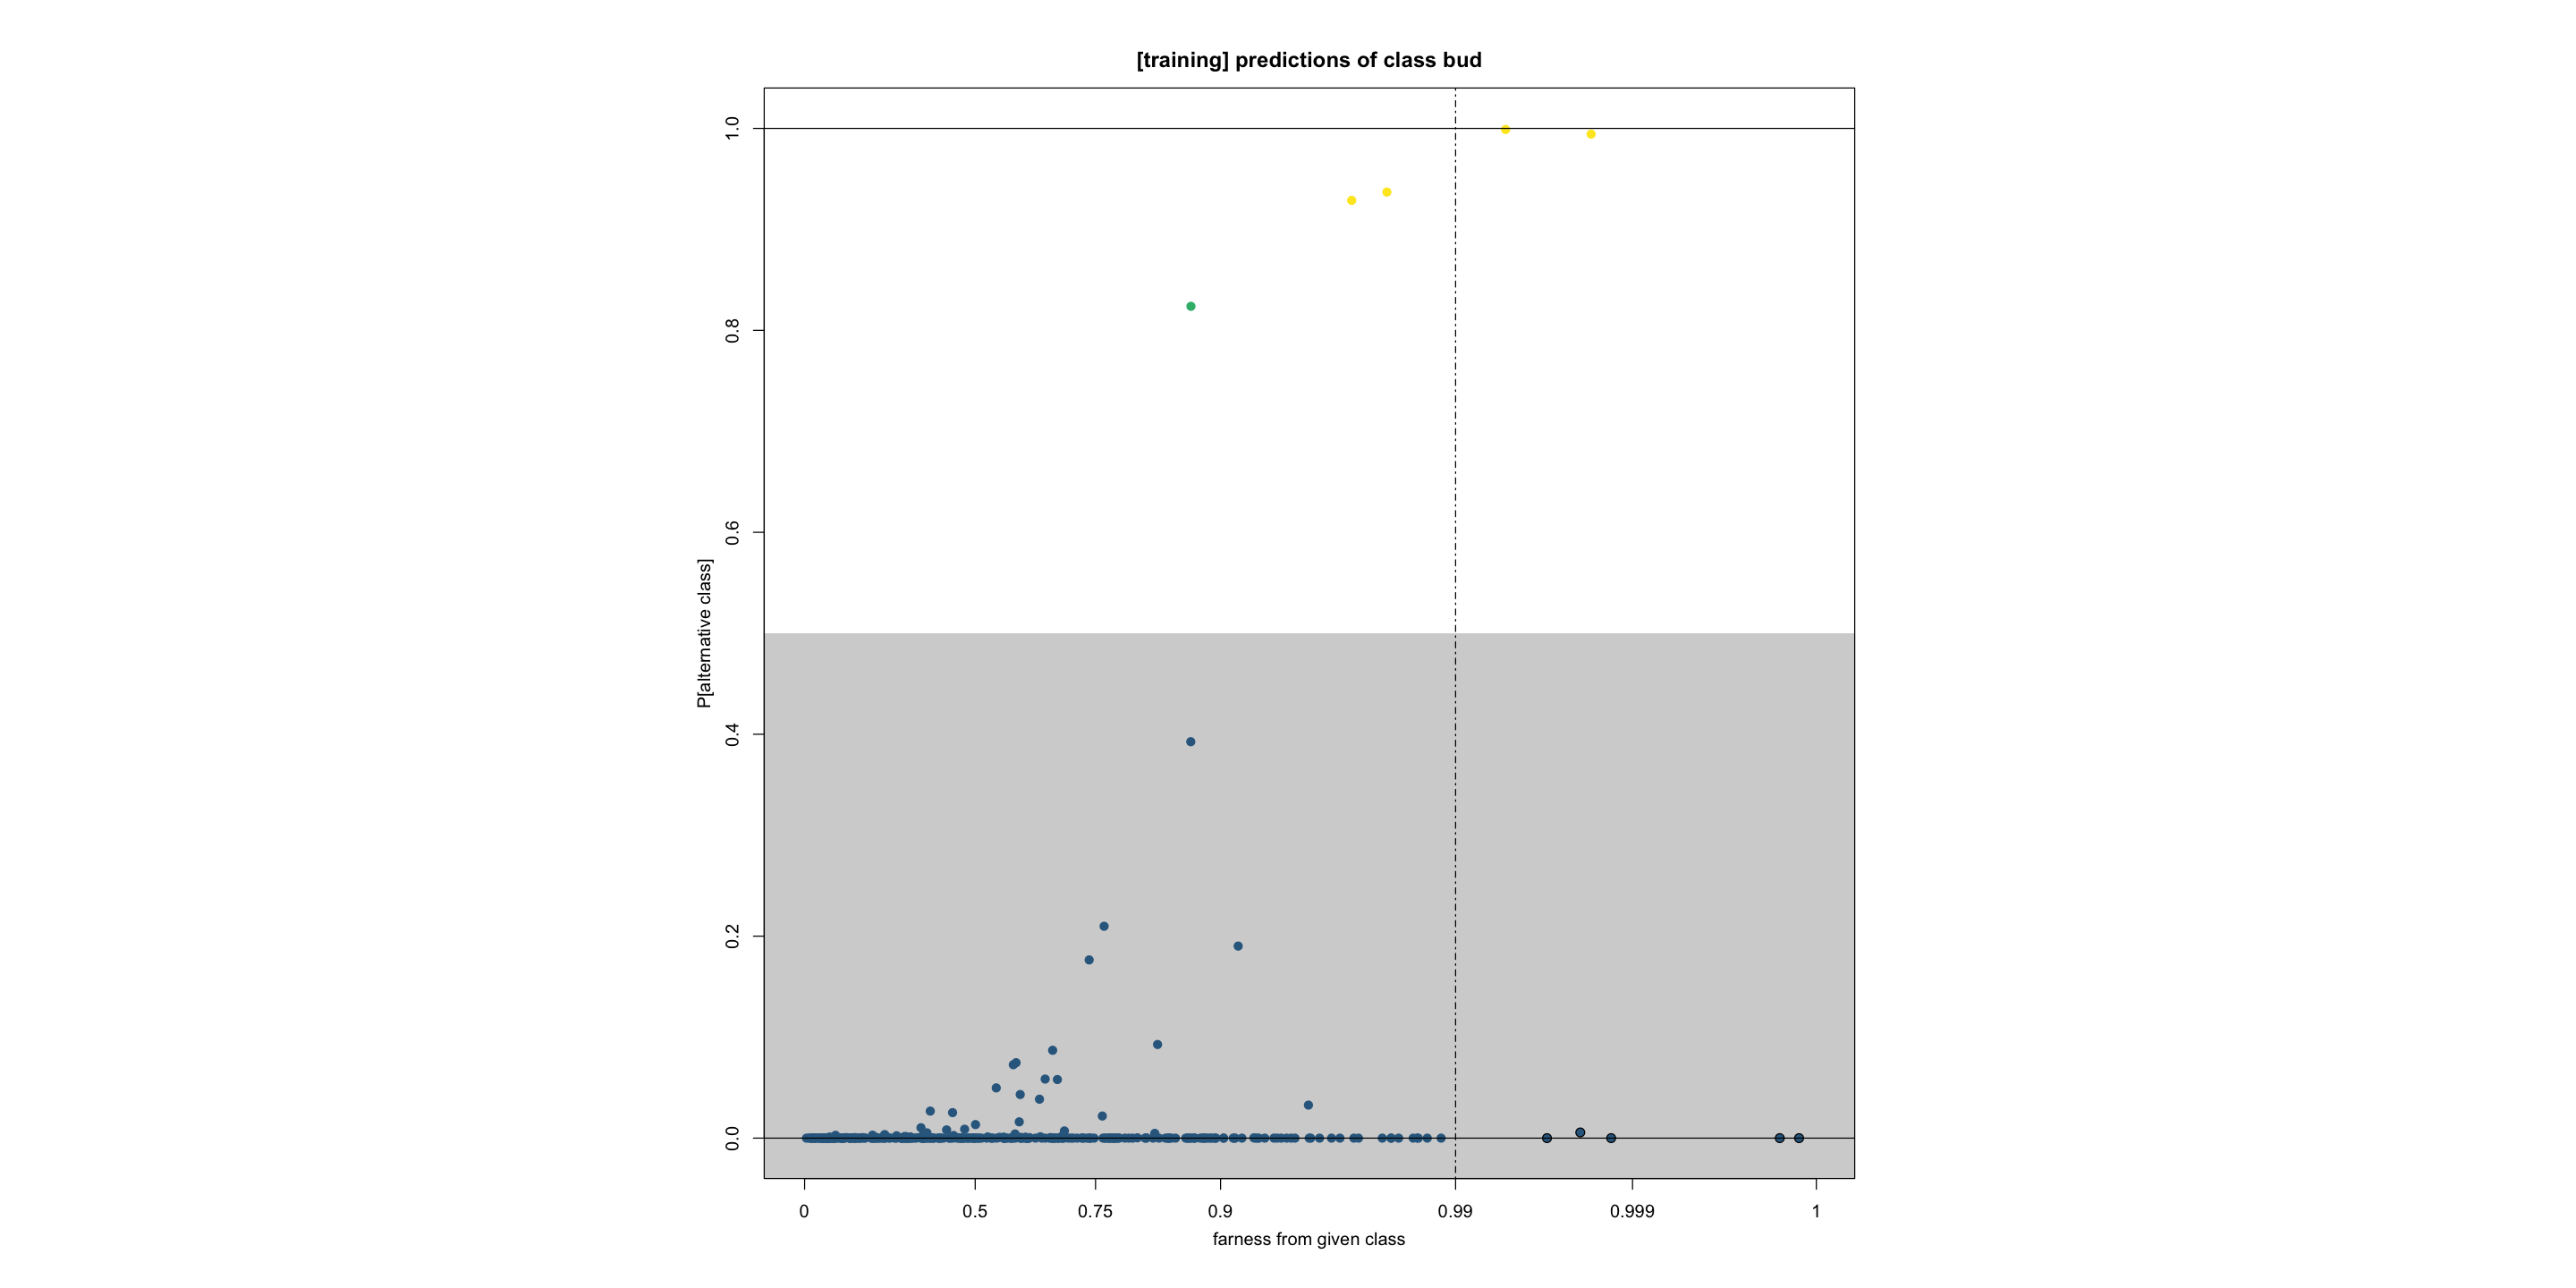

In [14]:
classmap(vcrout, 'bud', classCols=viridis::viridis(4)) # bud, branch, scales, support

Now, consider another data set. 

In [15]:
head(data_titanic, 3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y,dataType
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<fct>,<chr>
1,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,casualty,train
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,survived,train
3,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,survived,train


In [16]:
data_titanic <- na.omit(data_titanic)

In [17]:
help(data_titanic)

In [18]:
traindata <- data_titanic[which(data_titanic$dataType == "train"), -13]
str(traindata); table(traindata$y)
set.seed(123) # rpart is not deterministic

'data.frame':	714 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 7 8 9 10 11 ...
 $ Pclass     : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ y          : Factor w/ 2 levels "casualty","survived": 1 2 2 2 1 1 1 2 2 2 ...



casualty survived 
     424      290 

First, we will consider a tree-based classification. 

In [19]:
rpart.out <- rpart::rpart(y ~ Pclass + Sex + SibSp + Parch + Fare + Embarked, 
                   data = data_titanic, method = 'class', model = TRUE)

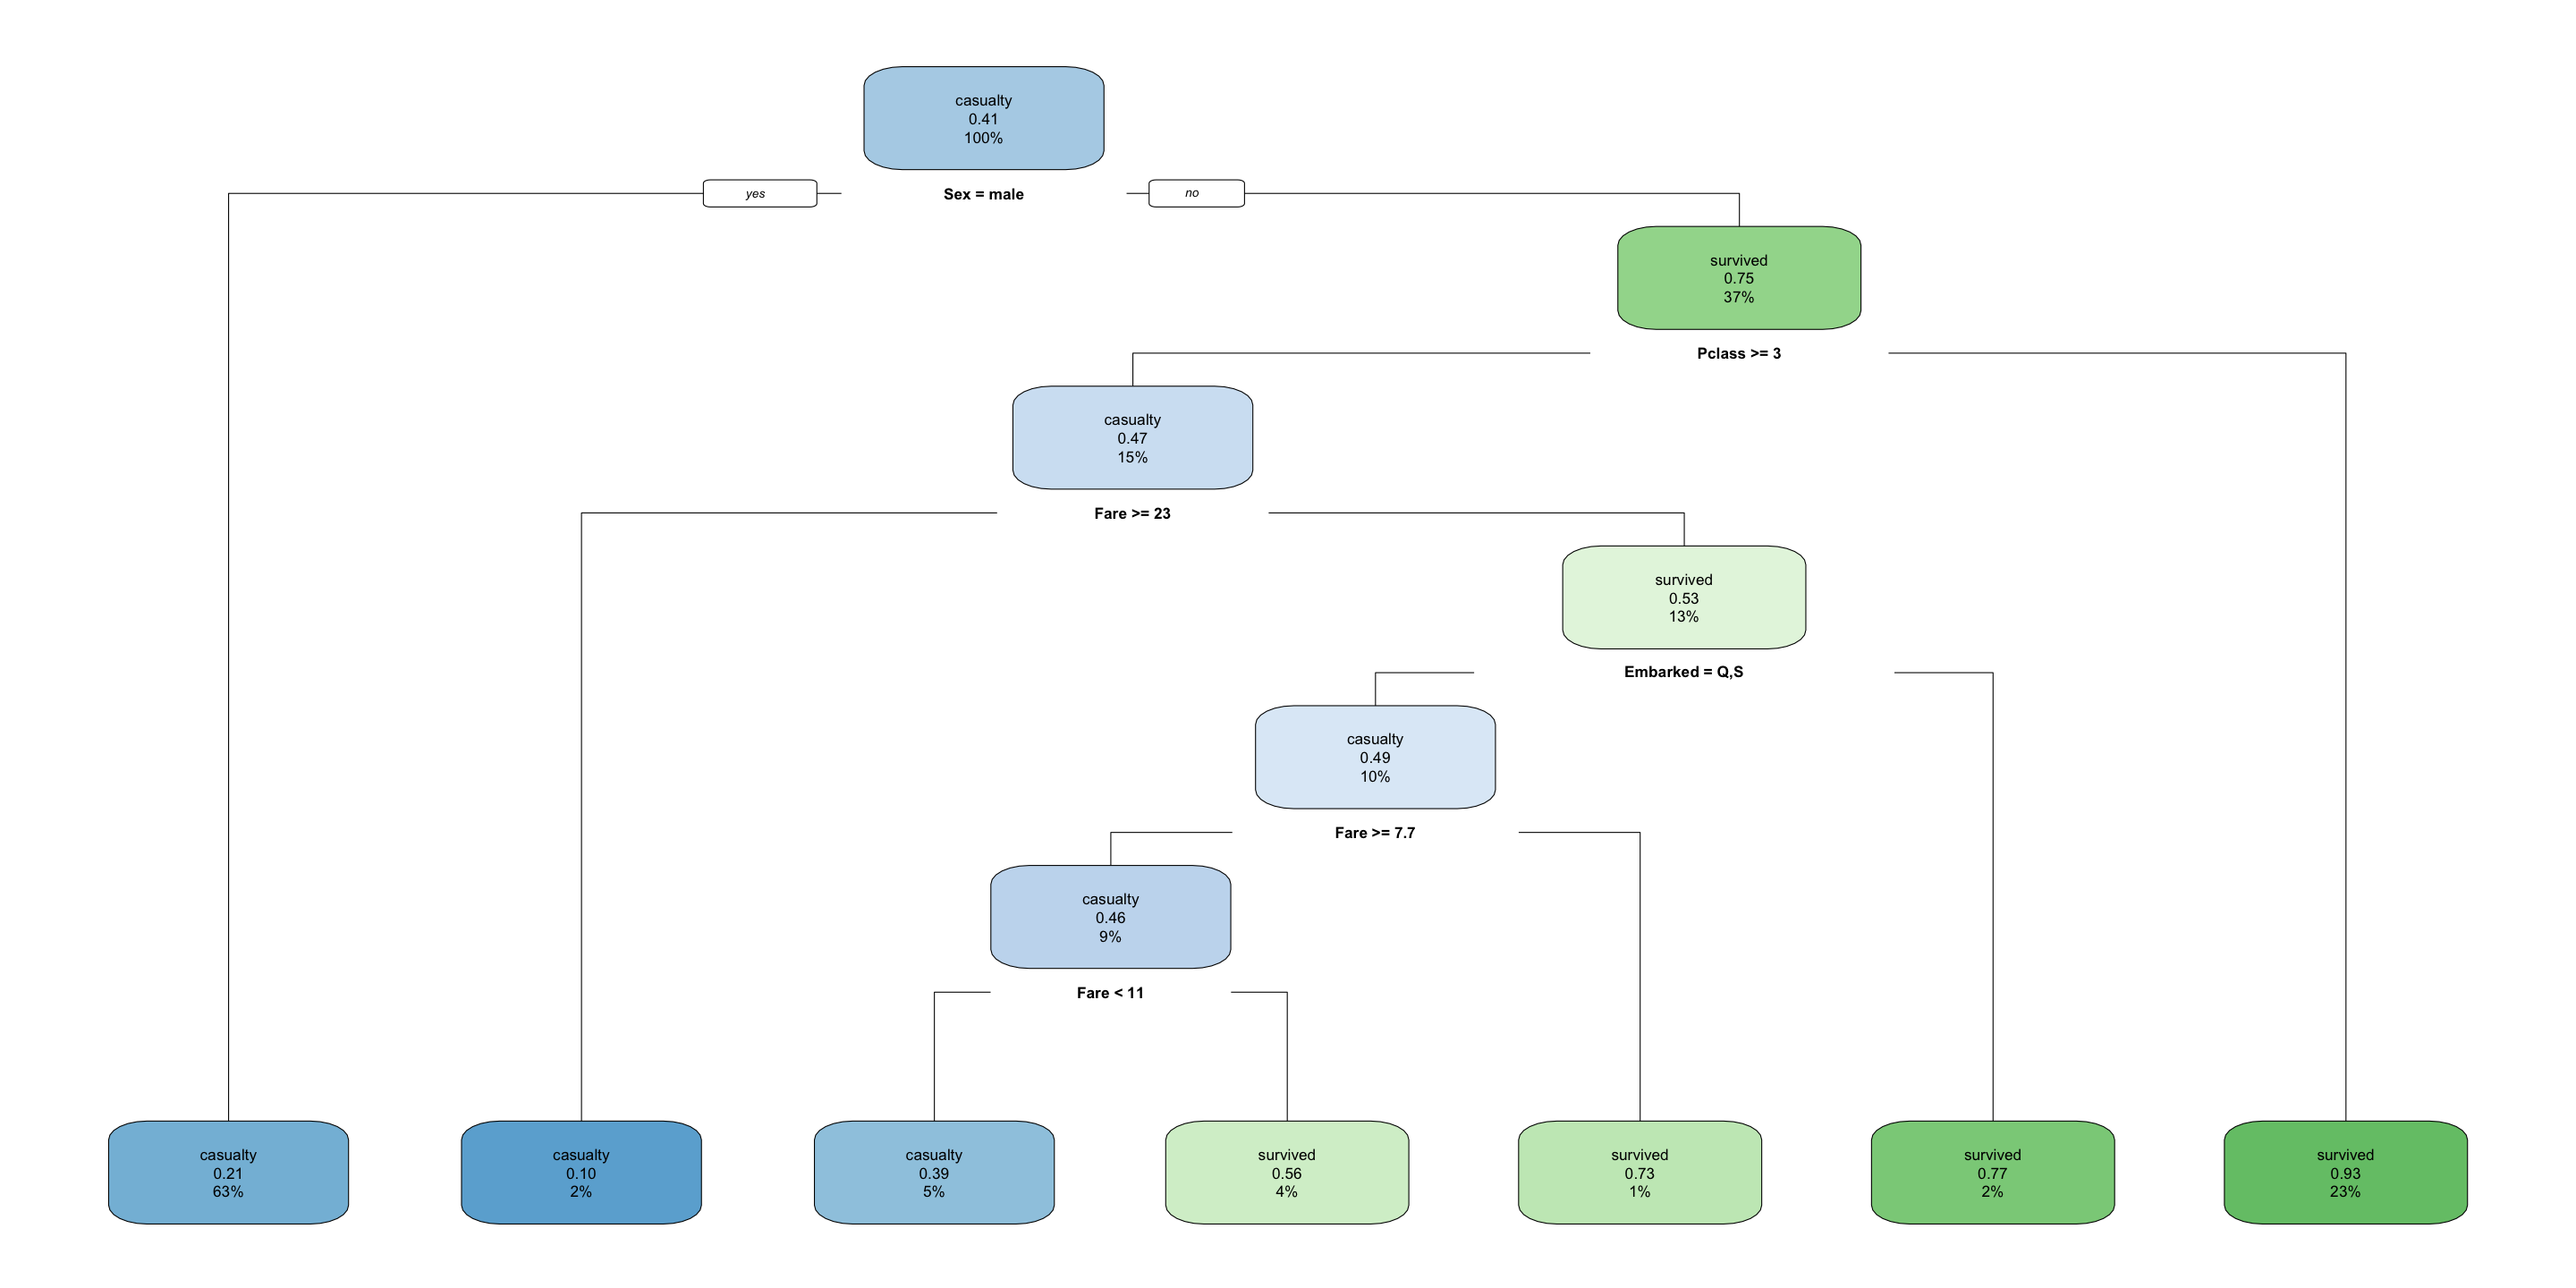

In [20]:
rpart.plot::rpart.plot(rpart.out)

Be careful in how to read the tree. 

In [21]:
mean(data_titanic$y=='survived')

[1] 0.4086124

In [22]:
mean((data_titanic$y=='survived')[data_titanic['Sex']=='male'])

[1] 0.2054795

In [23]:
sum(data_titanic['Sex']!='male' & data_titanic['Pclass']>=3 & data_titanic['Fare']>=23) #few obs

[1] 21

In [24]:
mytype <- list(nominal = c("Name", "Sex", "Ticket", "Cabin", "Embarked"), ordratio = c("Pclass"))
vcrtrain <- vcr.rpart.train(data_titanic[, -12], data_titanic$y, rpart.out, mytype)

In [25]:
confmat.vcr(vcrtrain)


Confusion matrix:
          predicted
given      casualty survived
  casualty      576       42
  survived      159      268

The accuracy is 80.77%.


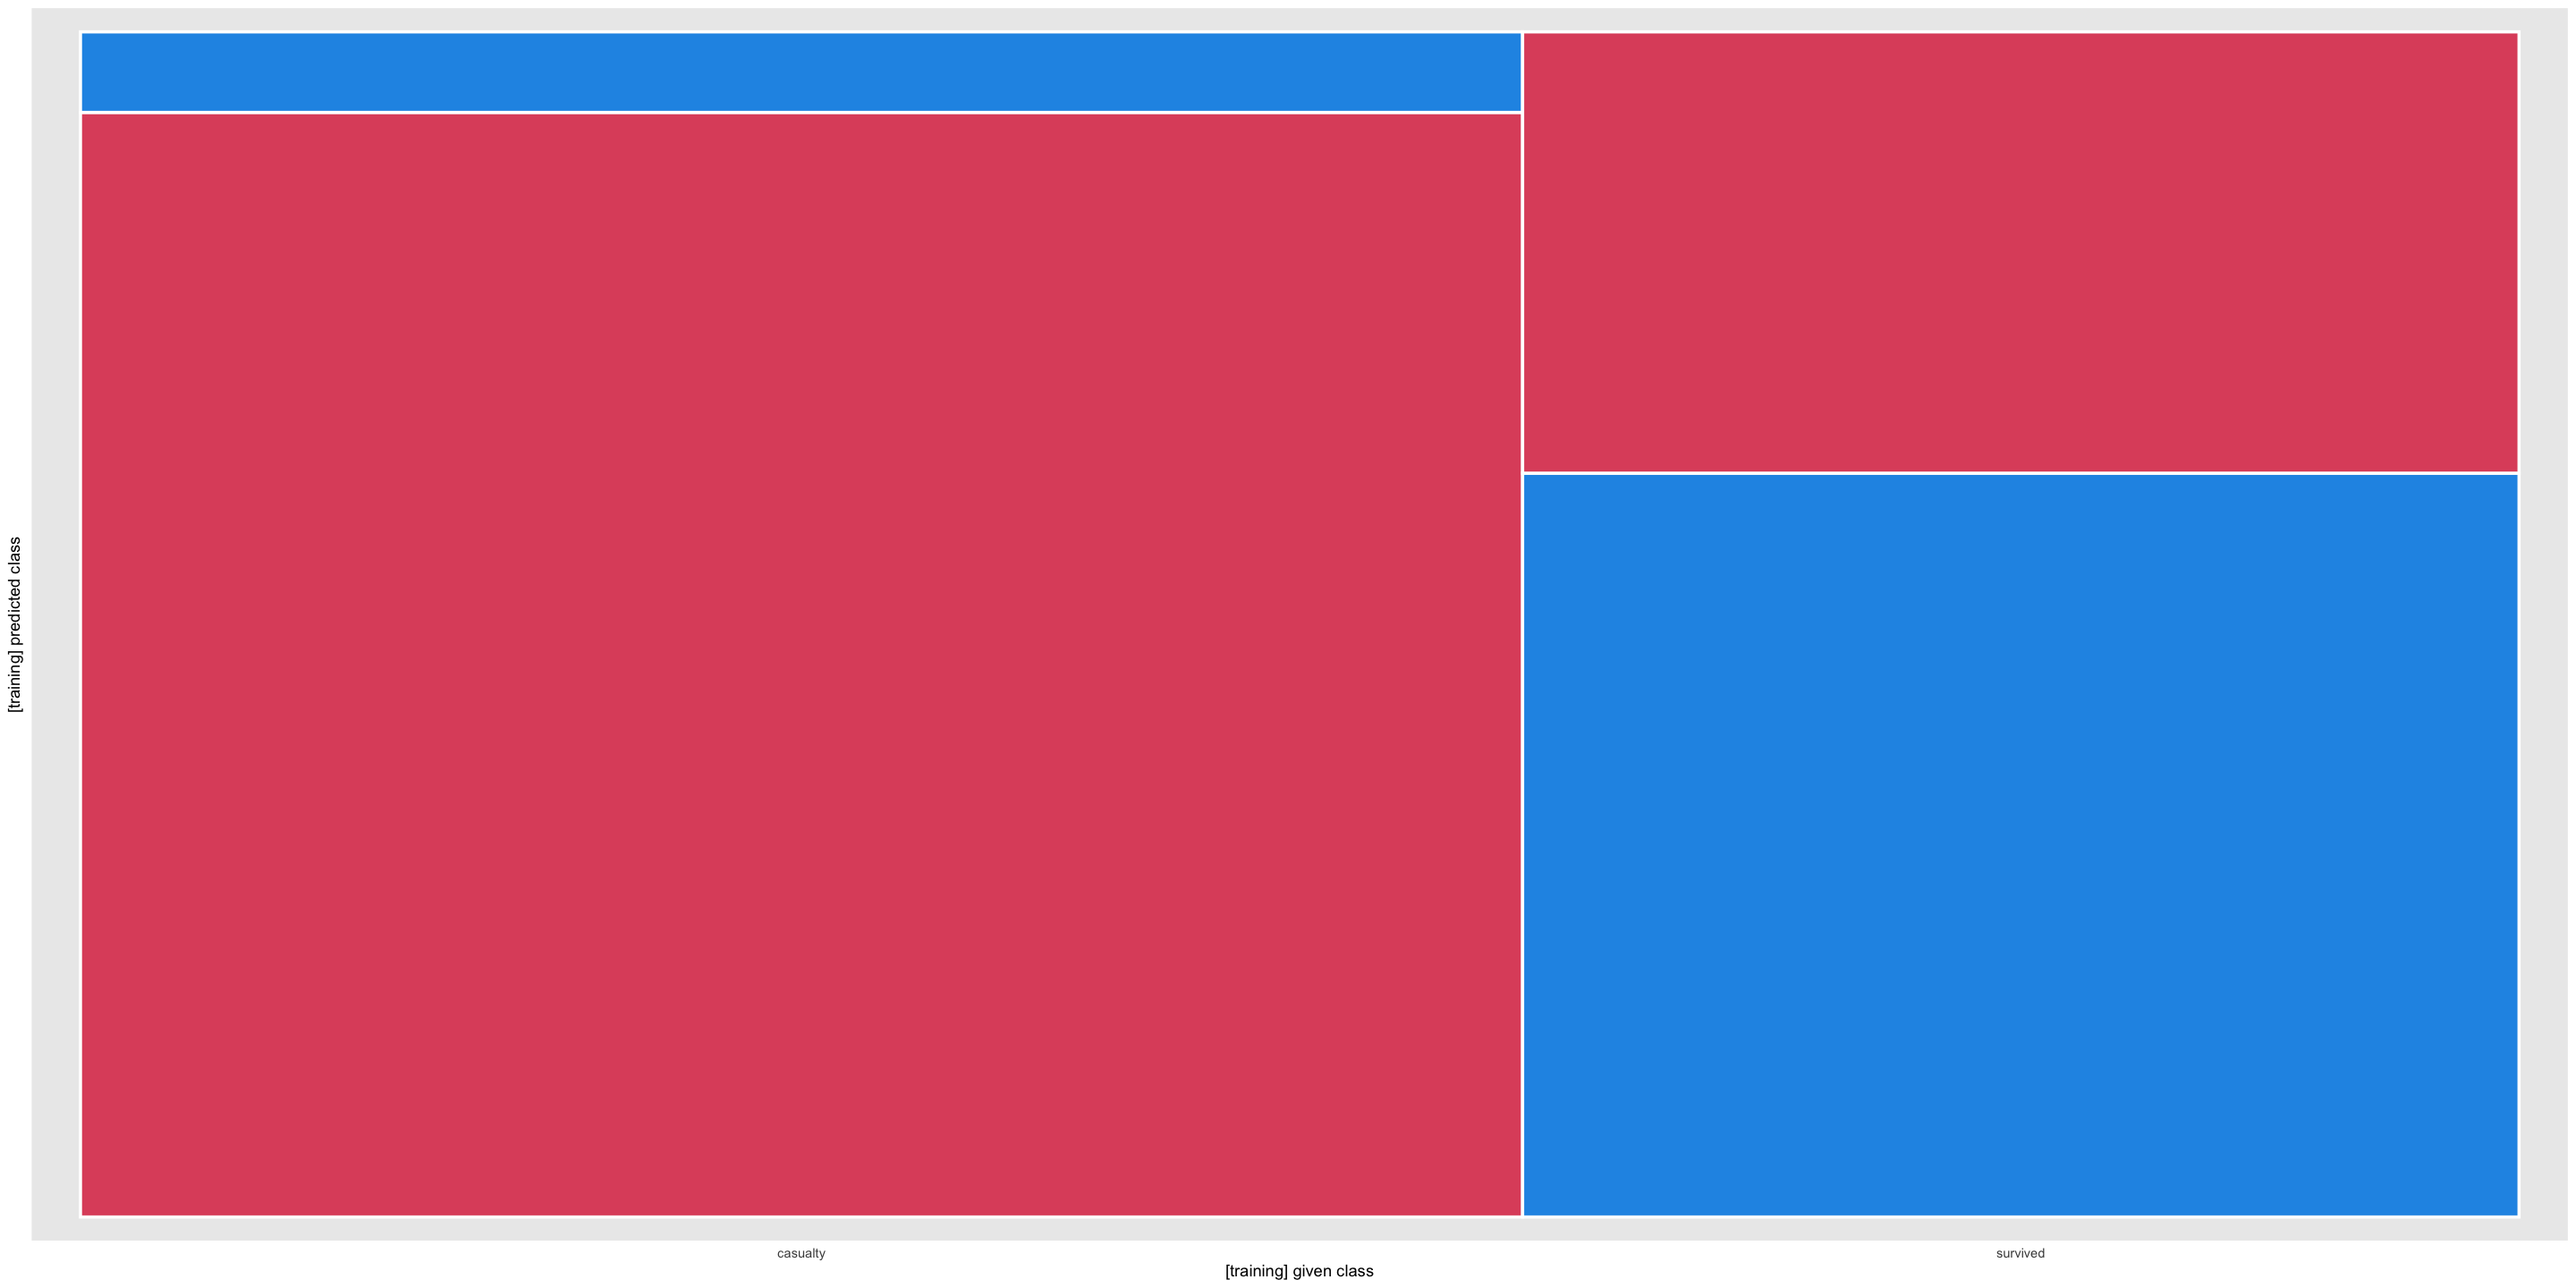

In [26]:
stackedplot(vcrtrain, classCols=c(2,4))

 classNumber classLabel classSize classAveSi
           1   casualty       618       0.50
           2   survived       427       0.28


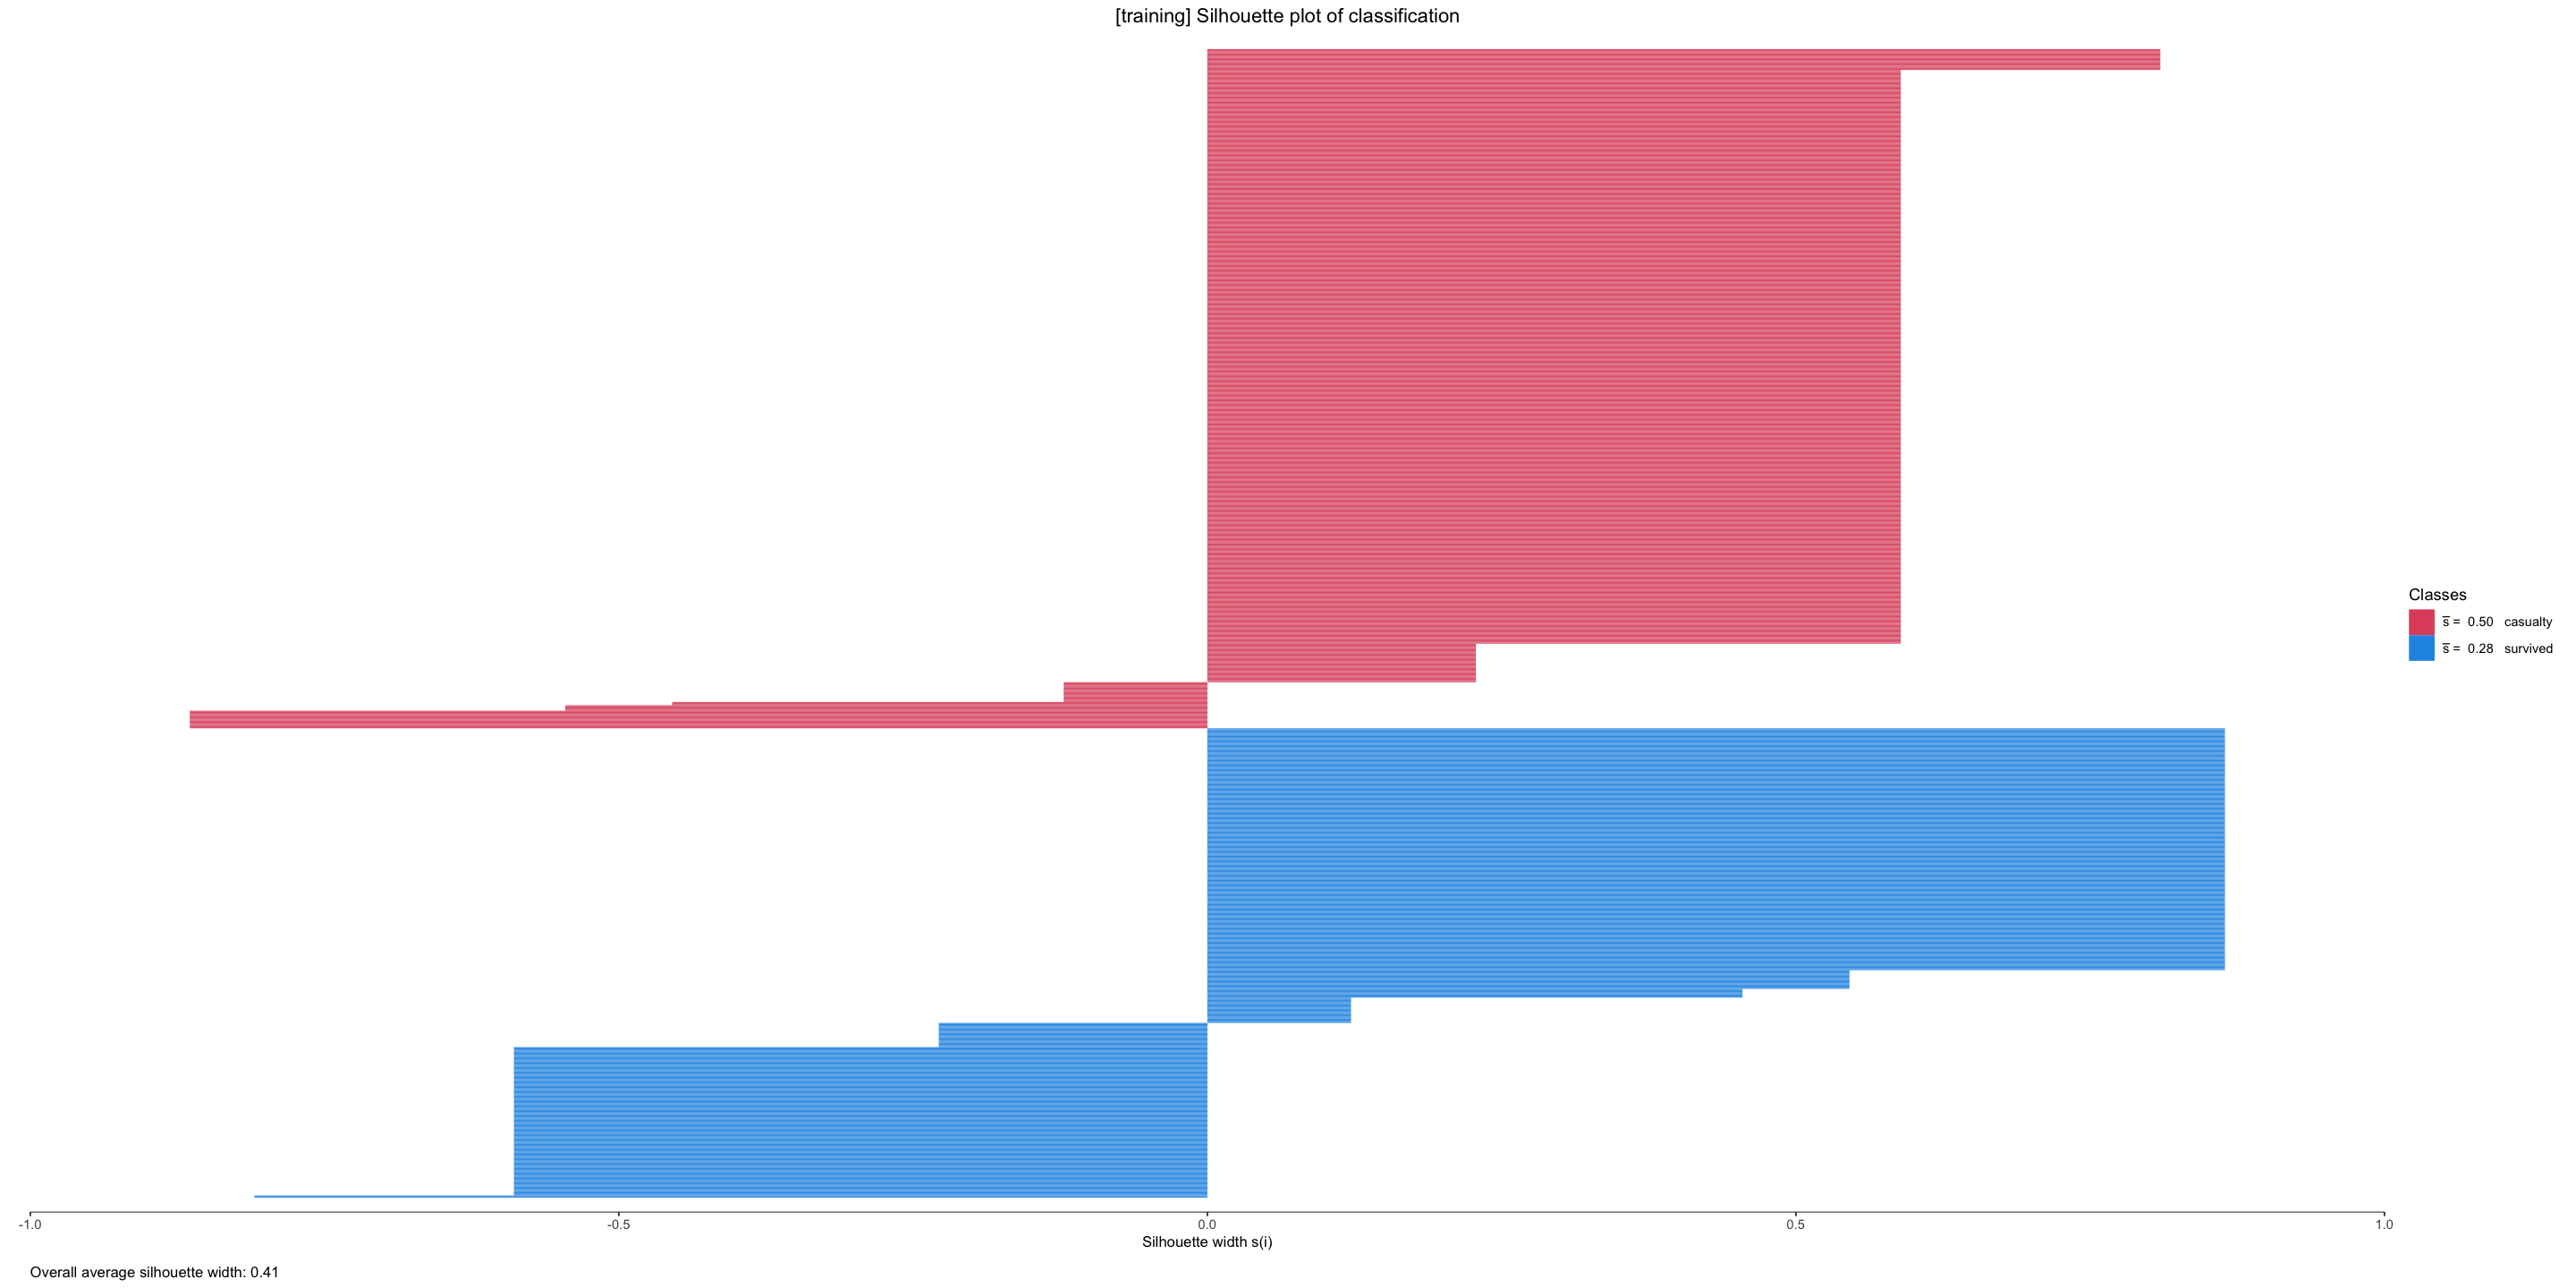

In [27]:
silplot(vcrtrain, classCols = c(2, 4))

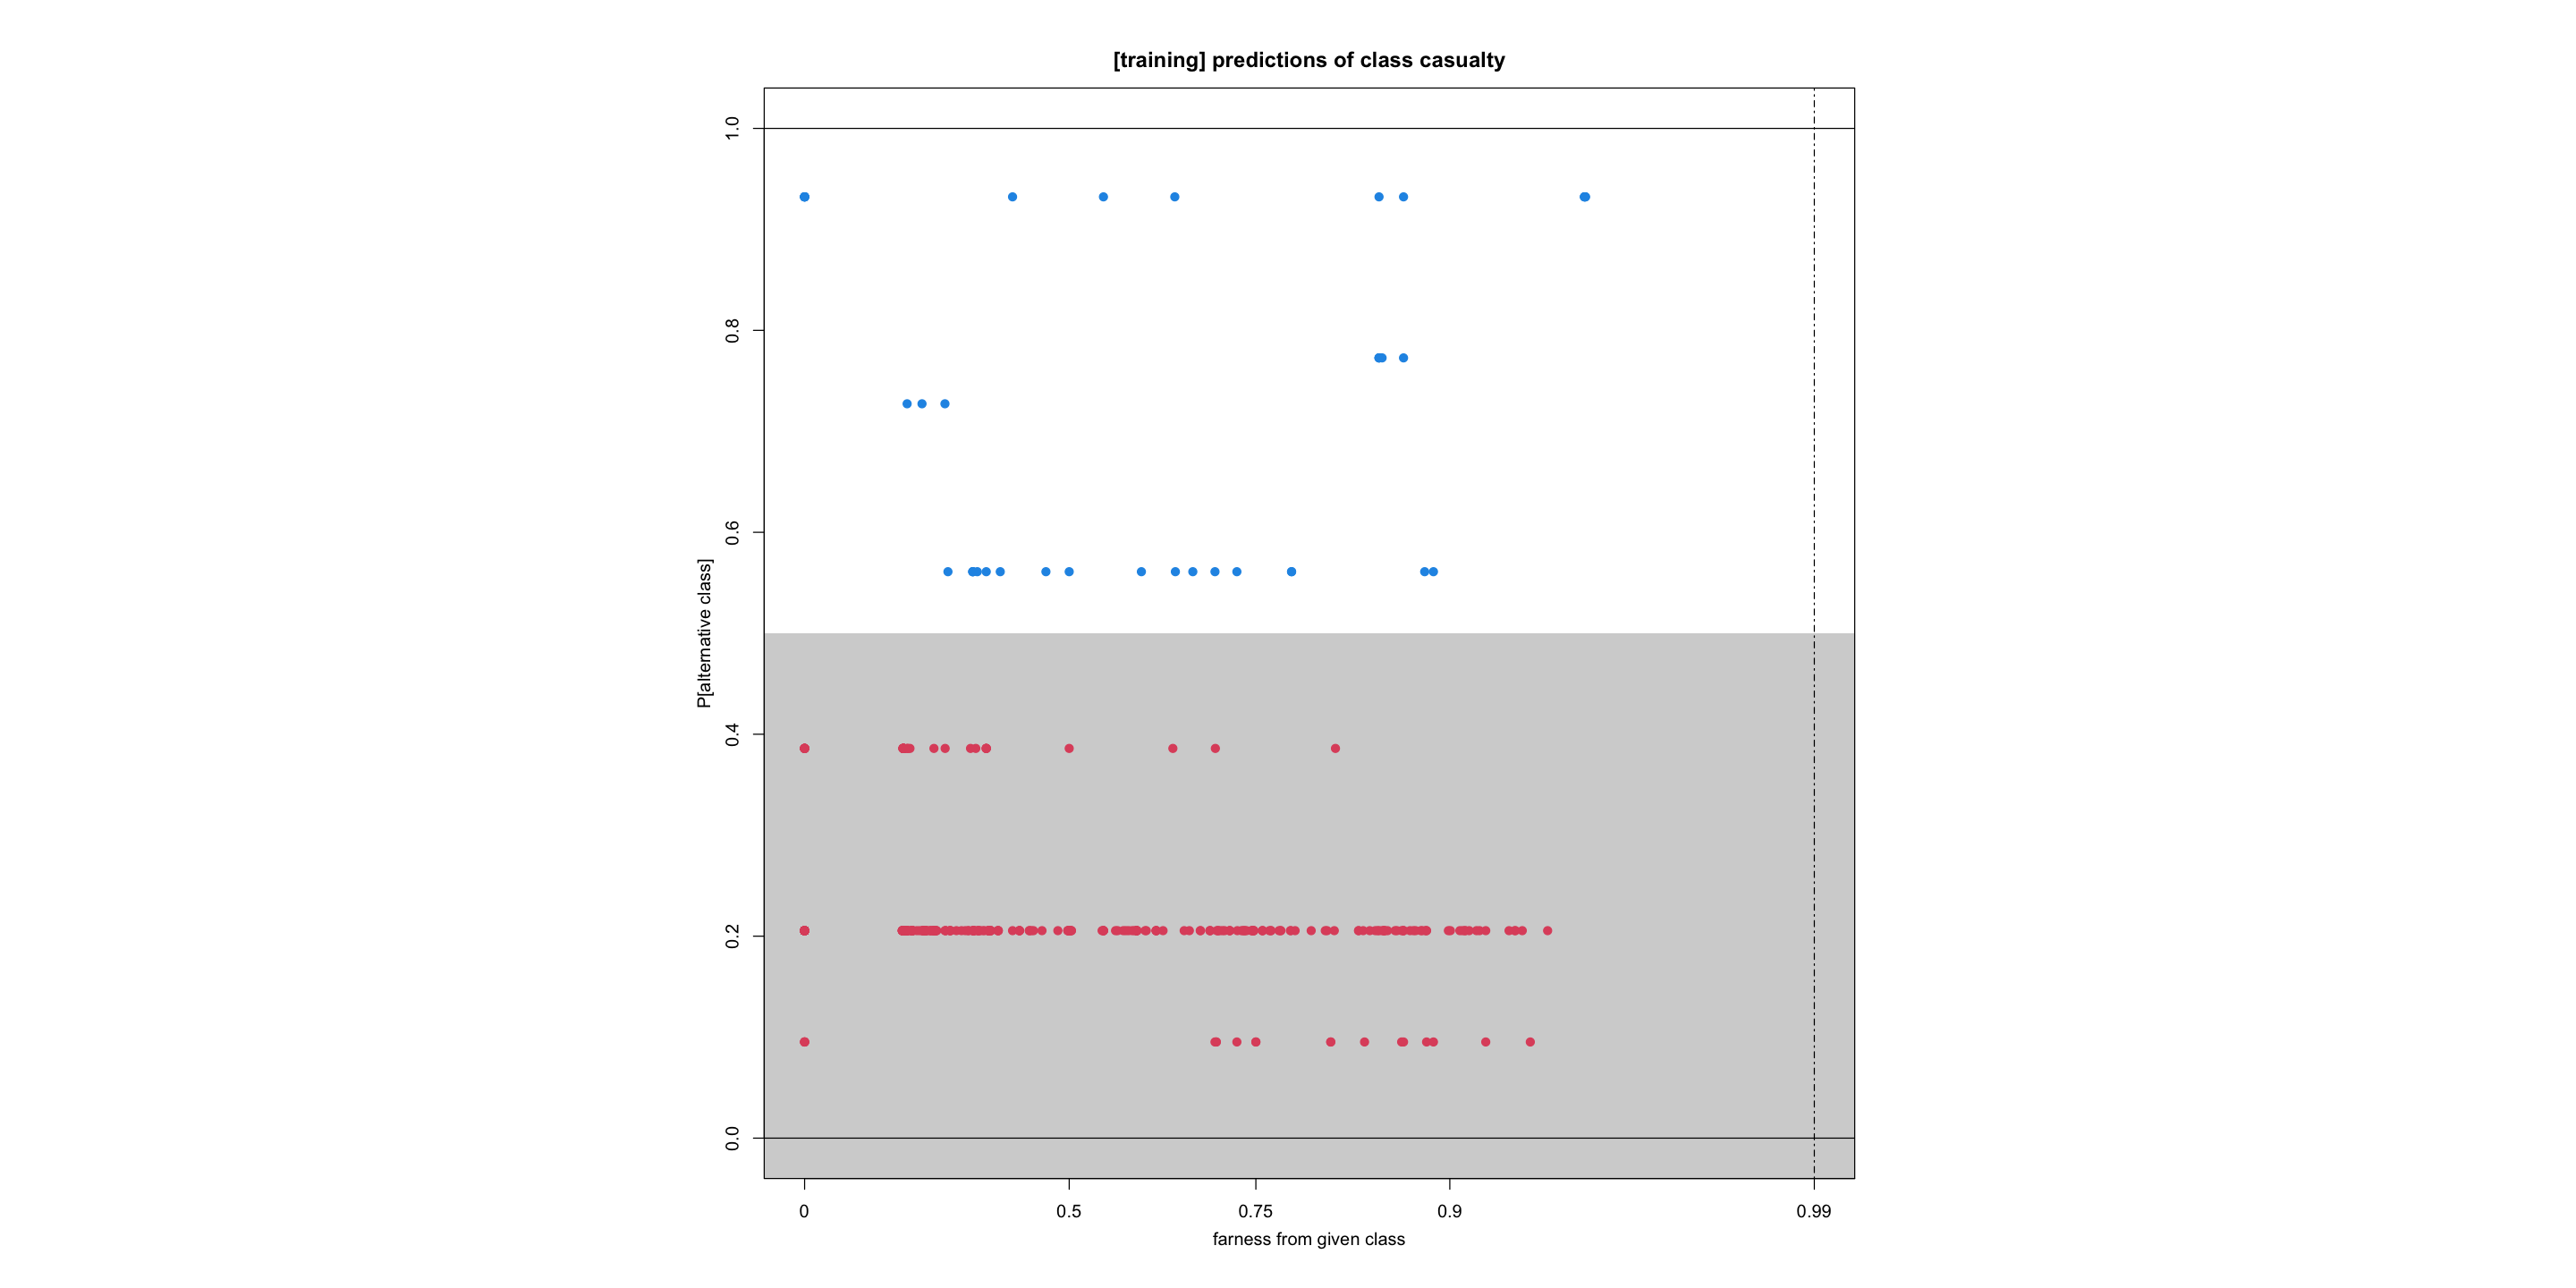

In [28]:
classmap(vcrtrain, "casualty", classCols = c(2, 4))

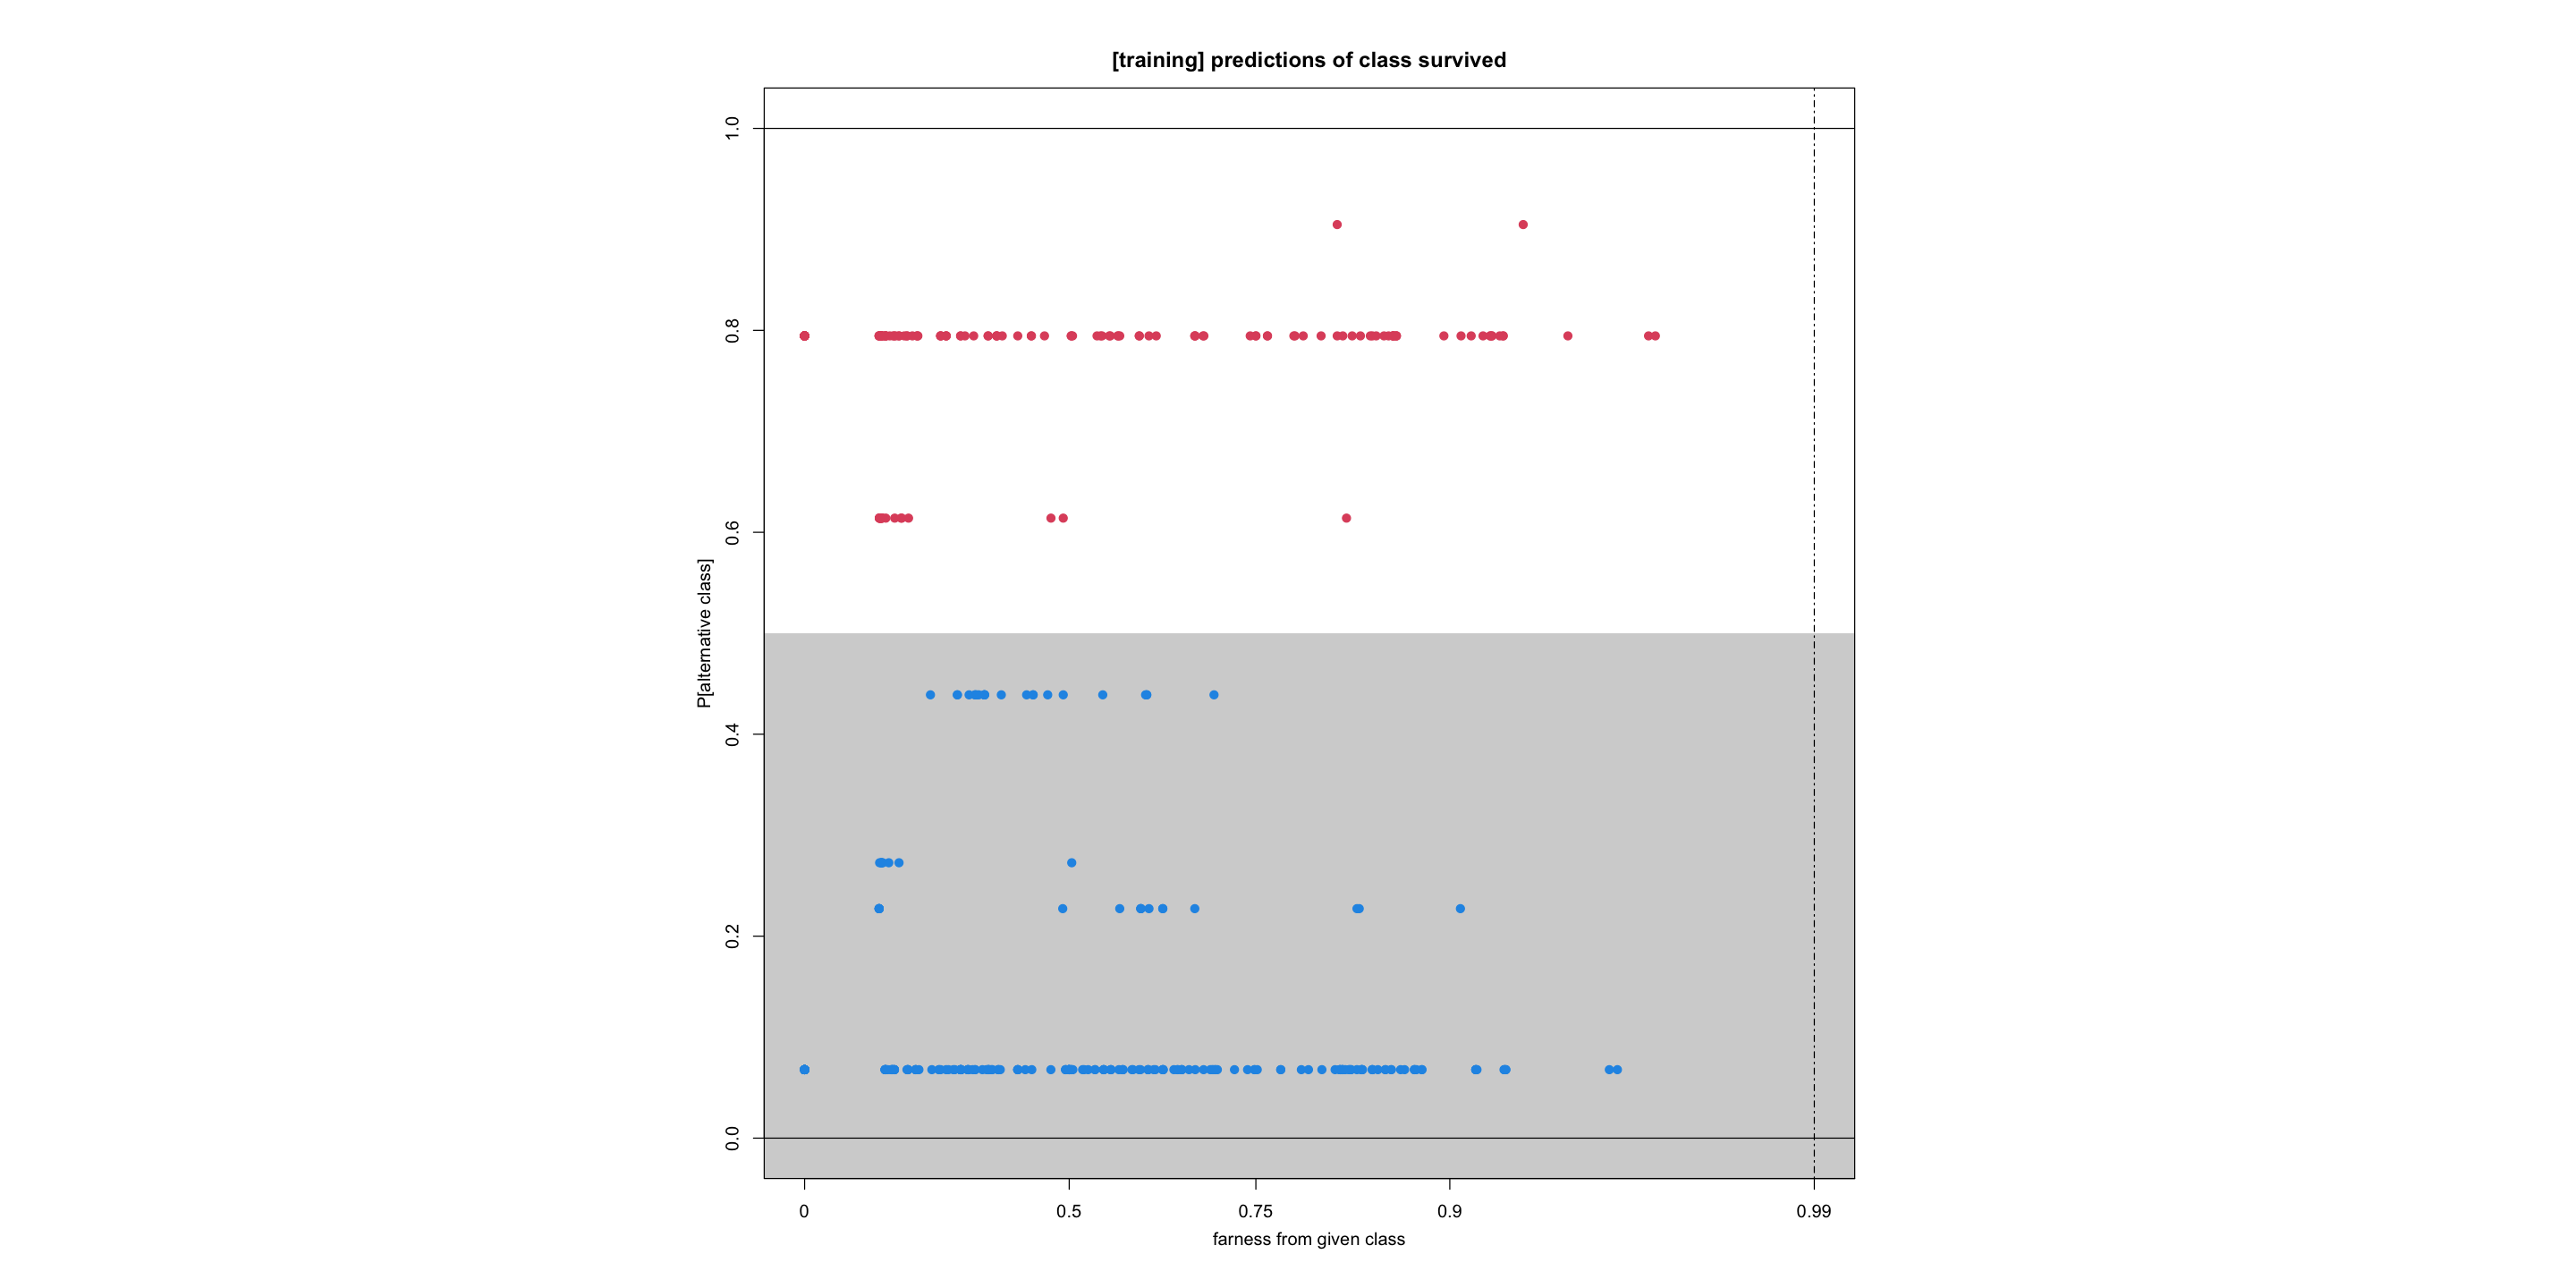

In [32]:
classmap(vcrtrain, "survived", classCols = c(2, 4))

Compare these visualizations to a logistic regression. 

In [33]:
str(vcrtrain)

List of 14
 $ X        :'data.frame':	1045 obs. of  12 variables:
  ..$ PassengerId: int [1:1045] 1 2 3 4 5 7 8 9 10 11 ...
  ..$ Pclass     : int [1:1045] 3 1 3 1 3 1 3 3 2 3 ...
  ..$ Name       : chr [1:1045] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
  ..$ Sex        : chr [1:1045] "male" "female" "female" "female" ...
  ..$ Age        : num [1:1045] 22 38 26 35 35 54 2 27 14 4 ...
  ..$ SibSp      : int [1:1045] 1 1 0 1 0 0 3 0 1 1 ...
  ..$ Parch      : int [1:1045] 0 0 0 0 0 0 1 2 0 1 ...
  ..$ Ticket     : chr [1:1045] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
  ..$ Fare       : num [1:1045] 7.25 71.28 7.92 53.1 8.05 ...
  ..$ Cabin      : chr [1:1045] "" "C85" "" "C123" ...
  ..$ Embarked   : chr [1:1045] "S" "C" "S" "S" ...
  ..$ dataType   : chr [1:1045] "train" "train" "train" "train" ...
 $ yint     : int [1:1045] 1 2 2 2 1 1 1 2 2 2 ...
 $ y       

Update `pred`, `predint` and `PAC` for the logistic regression. 

In [34]:
str(vcrtrain)

List of 14
 $ X        :'data.frame':	1045 obs. of  12 variables:
  ..$ PassengerId: int [1:1045] 1 2 3 4 5 7 8 9 10 11 ...
  ..$ Pclass     : int [1:1045] 3 1 3 1 3 1 3 3 2 3 ...
  ..$ Name       : chr [1:1045] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
  ..$ Sex        : chr [1:1045] "male" "female" "female" "female" ...
  ..$ Age        : num [1:1045] 22 38 26 35 35 54 2 27 14 4 ...
  ..$ SibSp      : int [1:1045] 1 1 0 1 0 0 3 0 1 1 ...
  ..$ Parch      : int [1:1045] 0 0 0 0 0 0 1 2 0 1 ...
  ..$ Ticket     : chr [1:1045] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
  ..$ Fare       : num [1:1045] 7.25 71.28 7.92 53.1 8.05 ...
  ..$ Cabin      : chr [1:1045] "" "C85" "" "C123" ...
  ..$ Embarked   : chr [1:1045] "S" "C" "S" "S" ...
  ..$ dataType   : chr [1:1045] "train" "train" "train" "train" ...
 $ yint     : int [1:1045] 1 2 2 2 1 1 1 2 2 2 ...
 $ y       

In [94]:
vcrtrain2 <- vcrtrain
fit <- glm(y~Pclass+Sex+Age+SibSp+Parch,family=binomial(link = logit),data=data_titanic)
pred <- fitted(fit) 

In [95]:
head(pred)

1          2          3          4          5          7 
0.09420910 0.87956181 0.61782483 0.89127043 0.08173911 0.30245150

In [96]:
vcrtrain2$pred <- ifelse(pred<0.5, "casualty", "survived")
head(vcrtrain2$pred)

1          2          3          4          5          7 
"casualty" "survived" "survived" "survived" "casualty" "casualty"

In [97]:
head(data_titanic$y)

[1] casualty survived survived survived casualty casualty
Levels: casualty survived

In [98]:
# manually add to vcrtrain2 the predictions ... 
vcrtrain2$predint <- ifelse(pred<0.5, 1, 2)
head(vcrtrain2$predint)

1 2 3 4 5 7 
1 2 2 2 1 1

In [99]:
# ... and compute success probs
vcrtrain2$PAC <- ifelse(data_titanic$y=='casualty', pred, 1-pred) 
head(vcrtrain2$PAC)

[1] 0.09420910 0.12043819 0.38217517 0.10872957 0.08173911 0.30245150

In [100]:
confmat.vcr(vcrtrain)


Confusion matrix:
          predicted
given      casualty survived
  casualty      576       42
  survived      159      268

The accuracy is 80.77%.


In [101]:
caret::confusionMatrix(data_titanic$y[!is.na(data_titanic$Age)], factor(vcrtrain2$pred), 
                       dnn = c("Reference", "Prediction"))$table # same as confmat.vcr(vcrtrain2)

          Prediction
Reference  casualty survived
  casualty      522       96
  survived      126      301

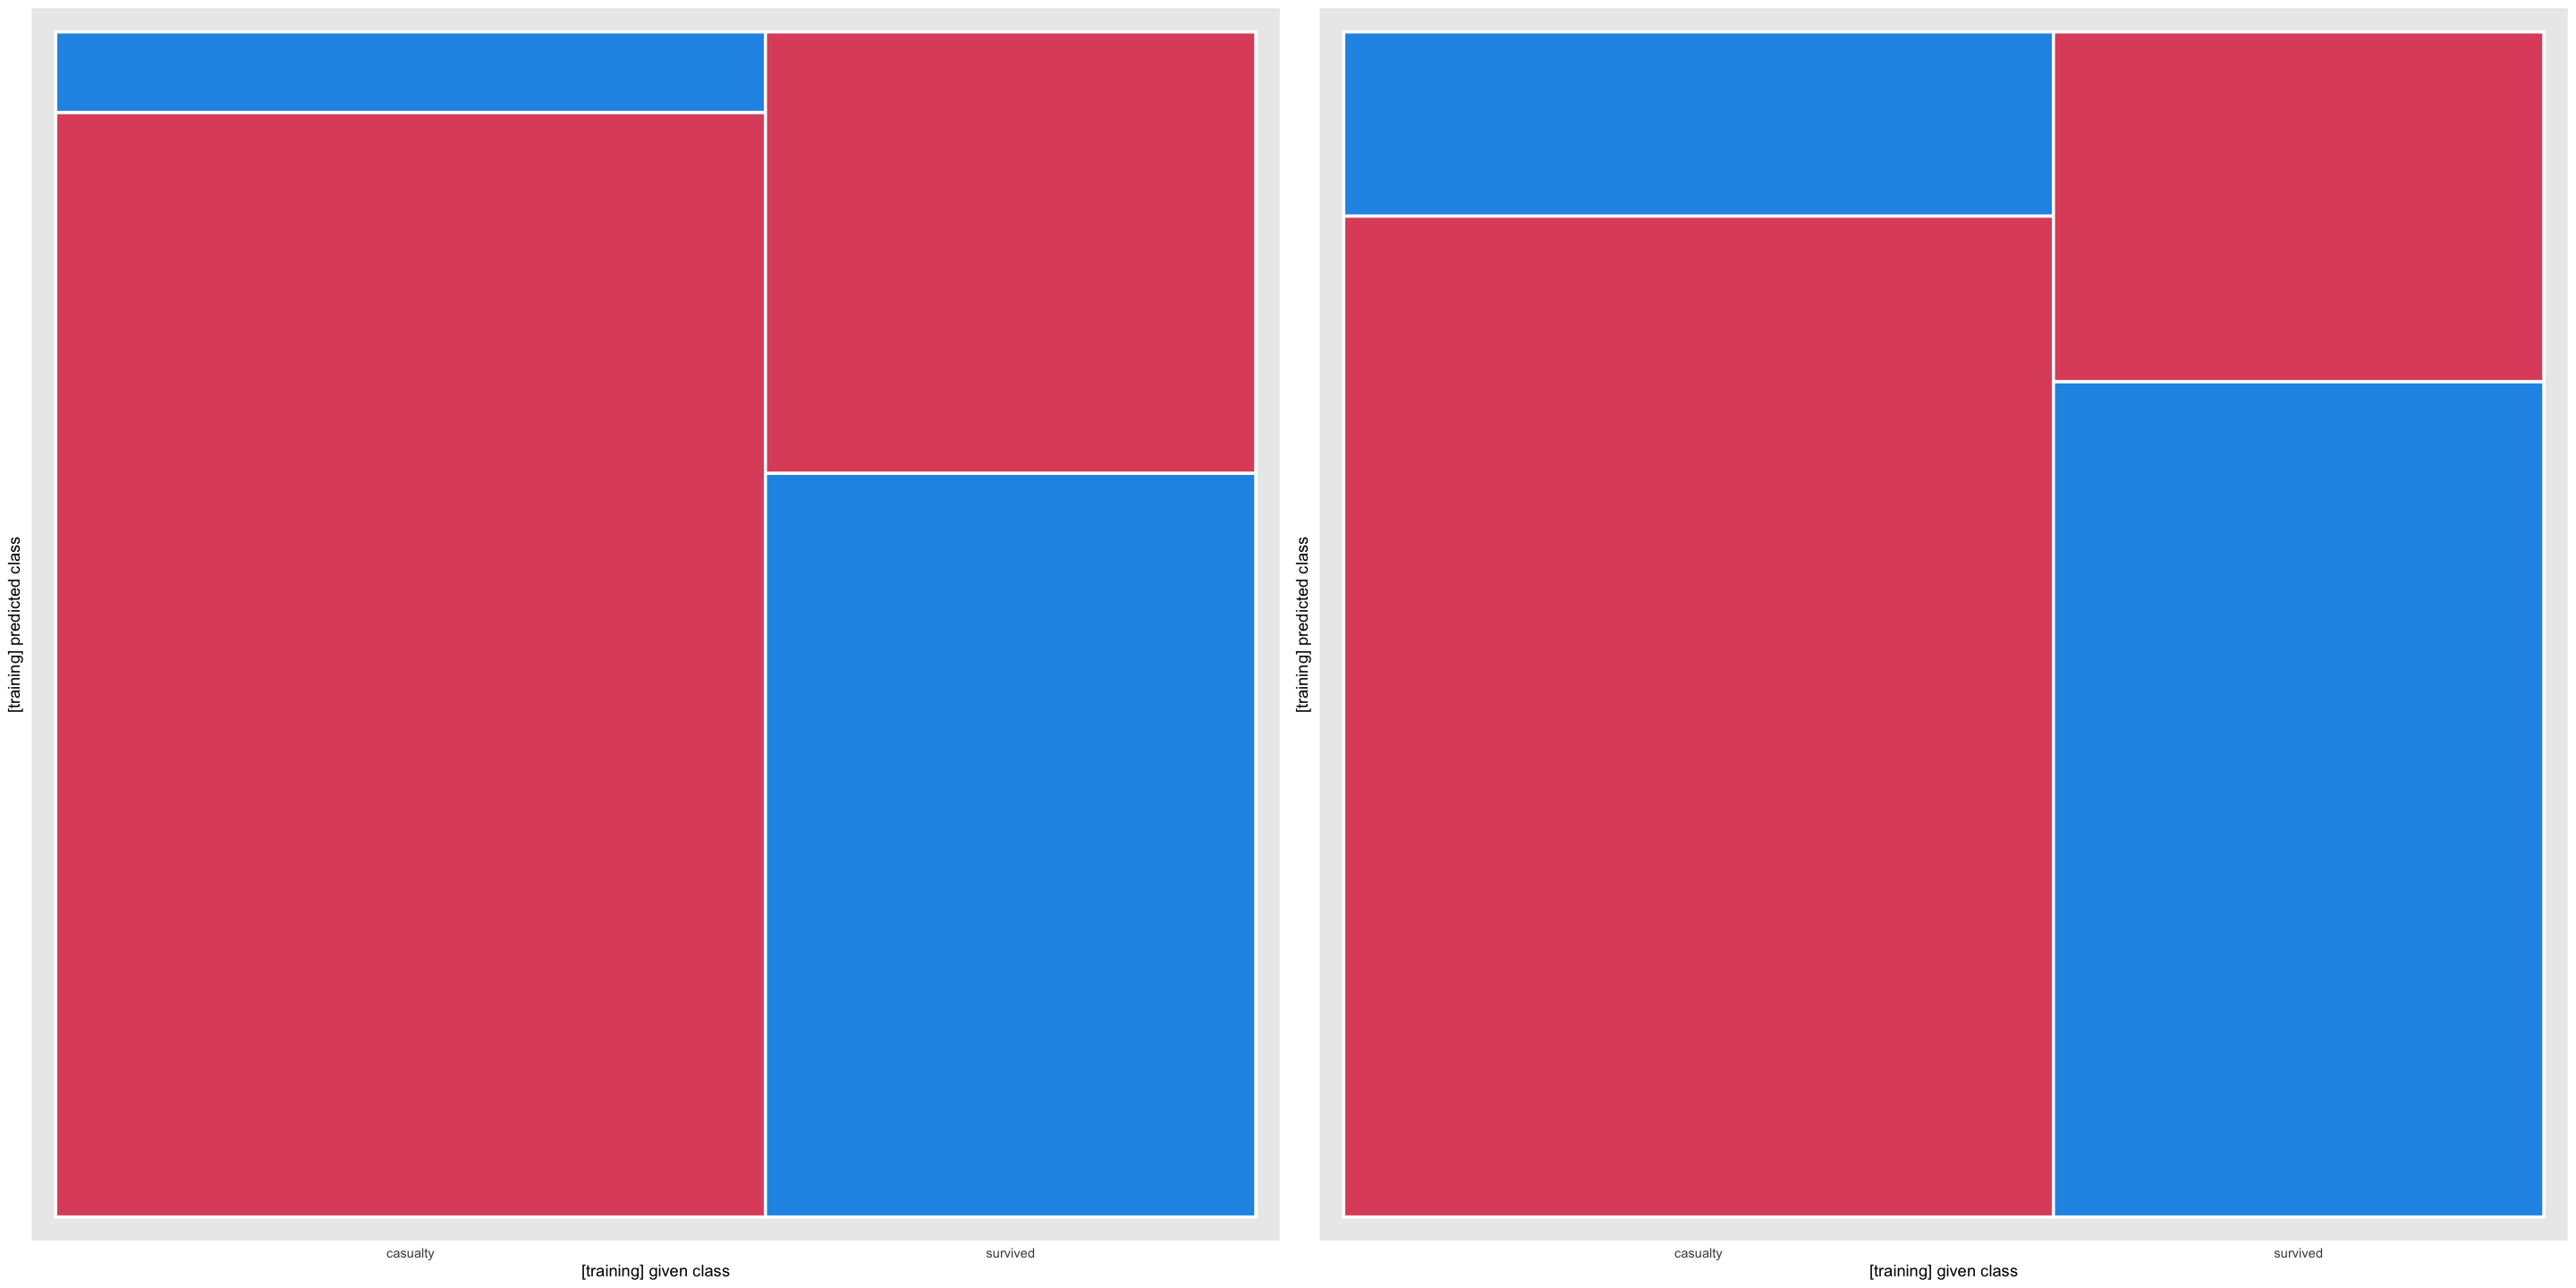

In [102]:
gridExtra::grid.arrange(
    stackedplot(vcrtrain, classCols=c(2,4)),
    stackedplot(vcrtrain2, classCols=c(2,4)), ncol = 2)

 classNumber classLabel classSize classAveSi
           1   casualty       618       0.50
           2   survived       427       0.28
 classNumber classLabel classSize classAveSi
           1   casualty       618       0.50
           2   survived       427       0.27


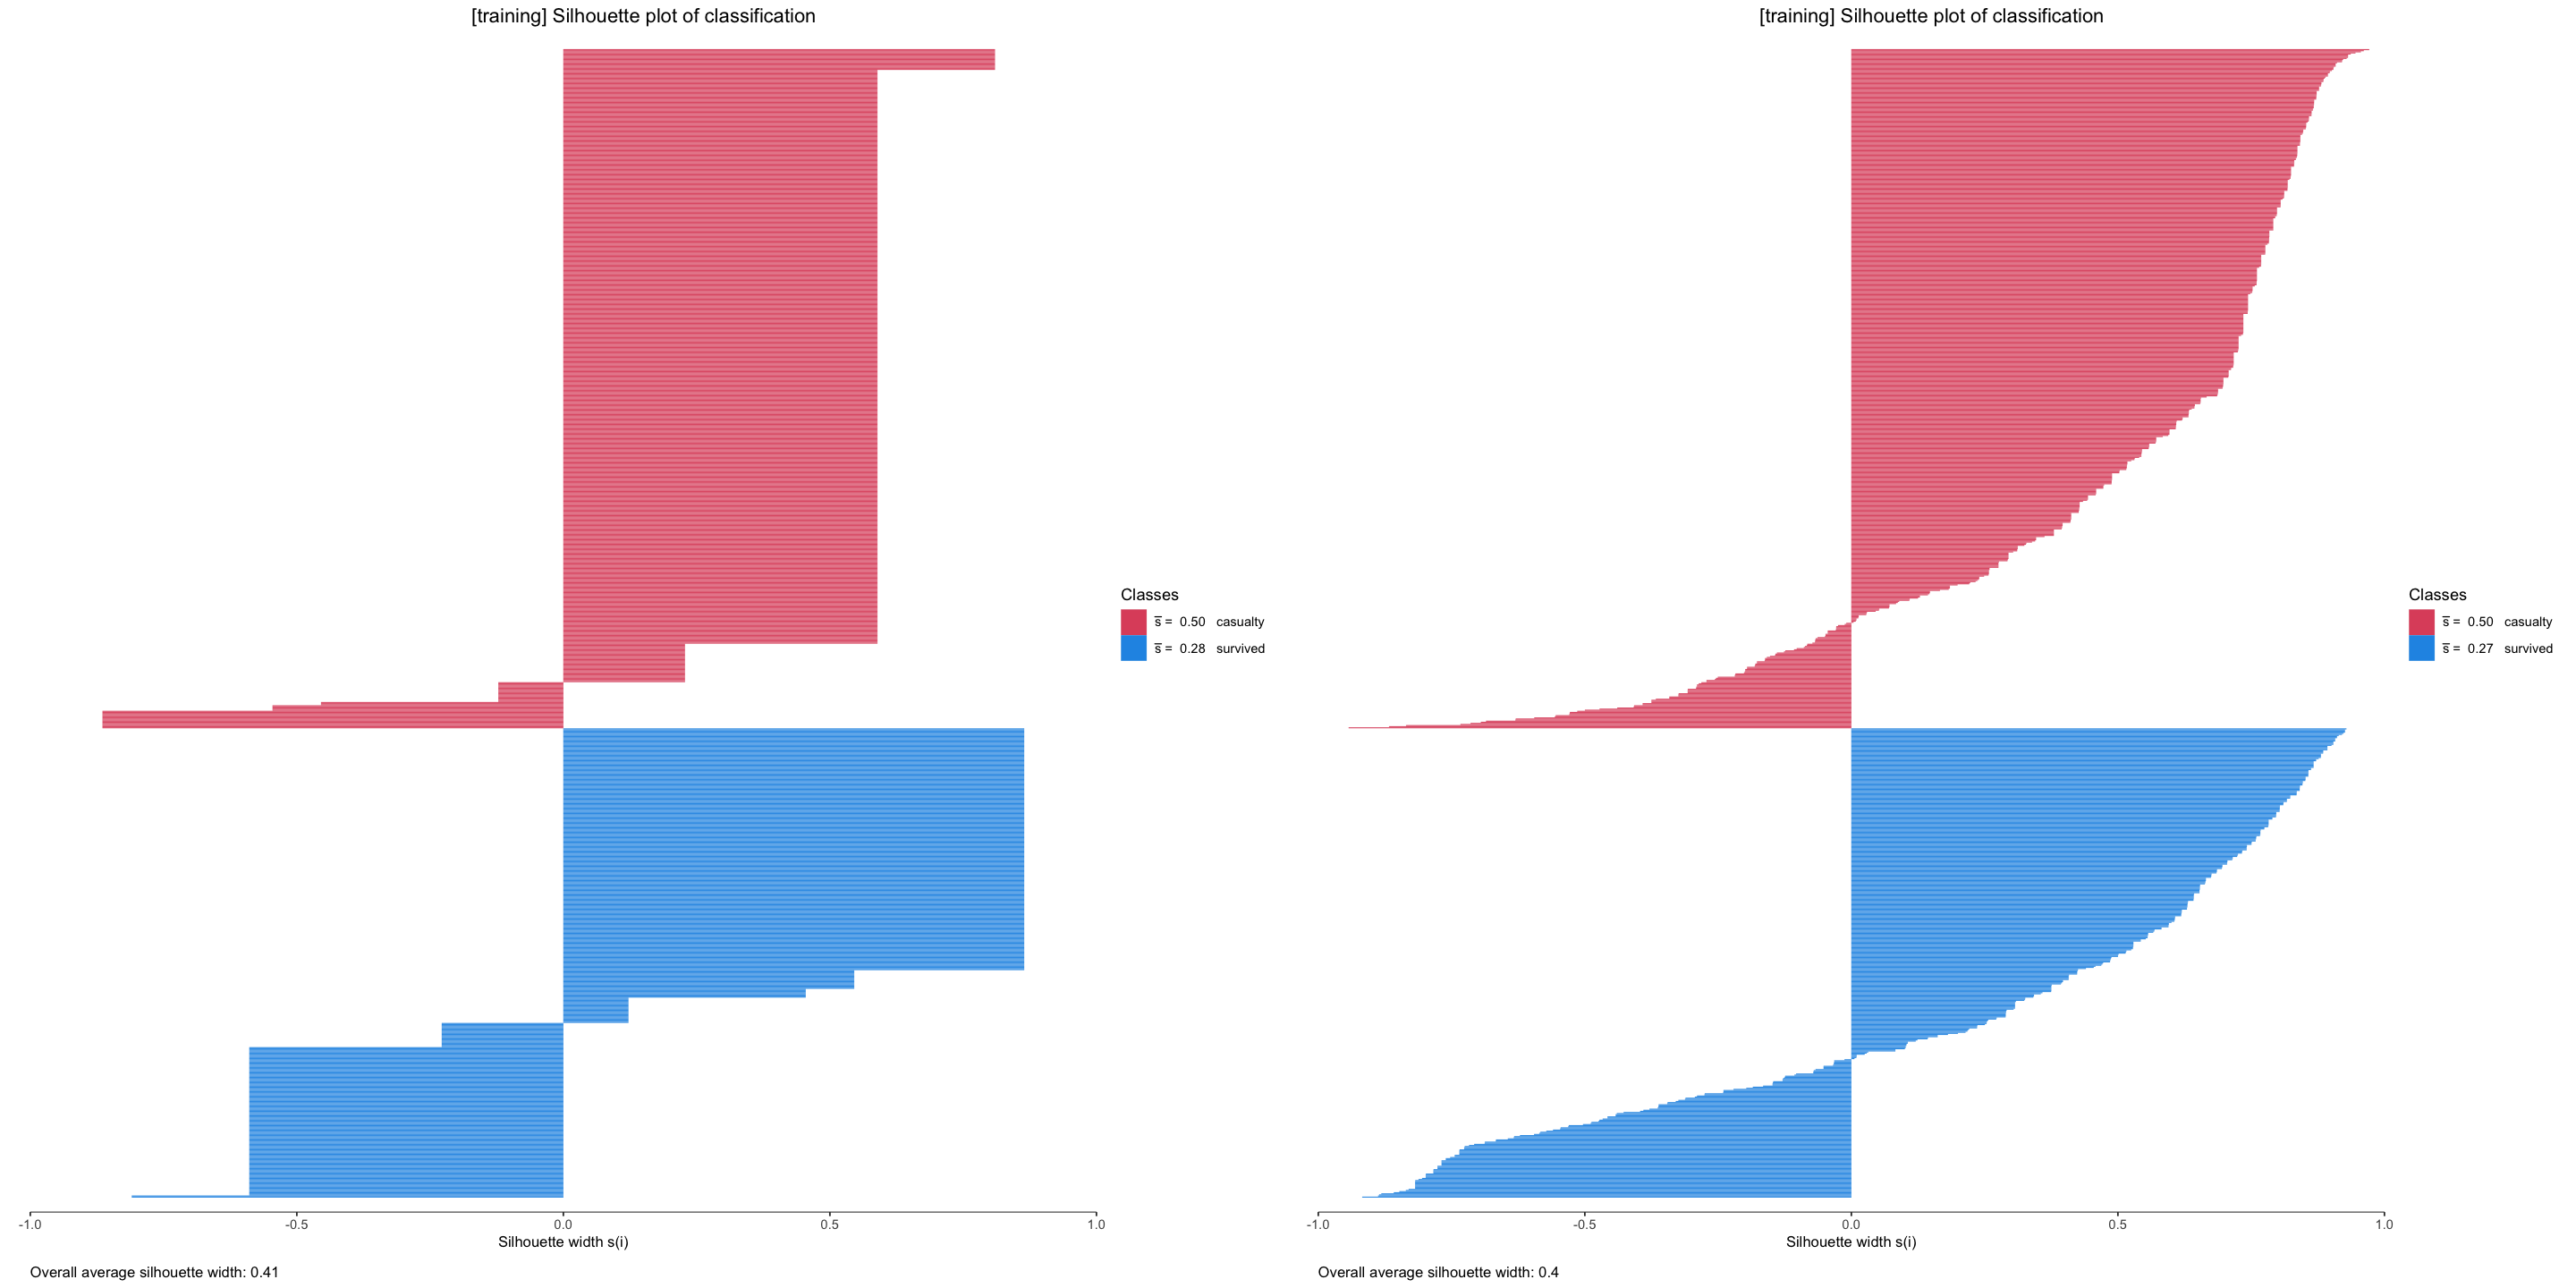

In [103]:
gridExtra::grid.arrange(gridExtra::arrangeGrob(
    silplot(vcrtrain, classCols = c(2, 4)), 
    silplot(vcrtrain2, classCols = c(2, 4)), ncol=2))

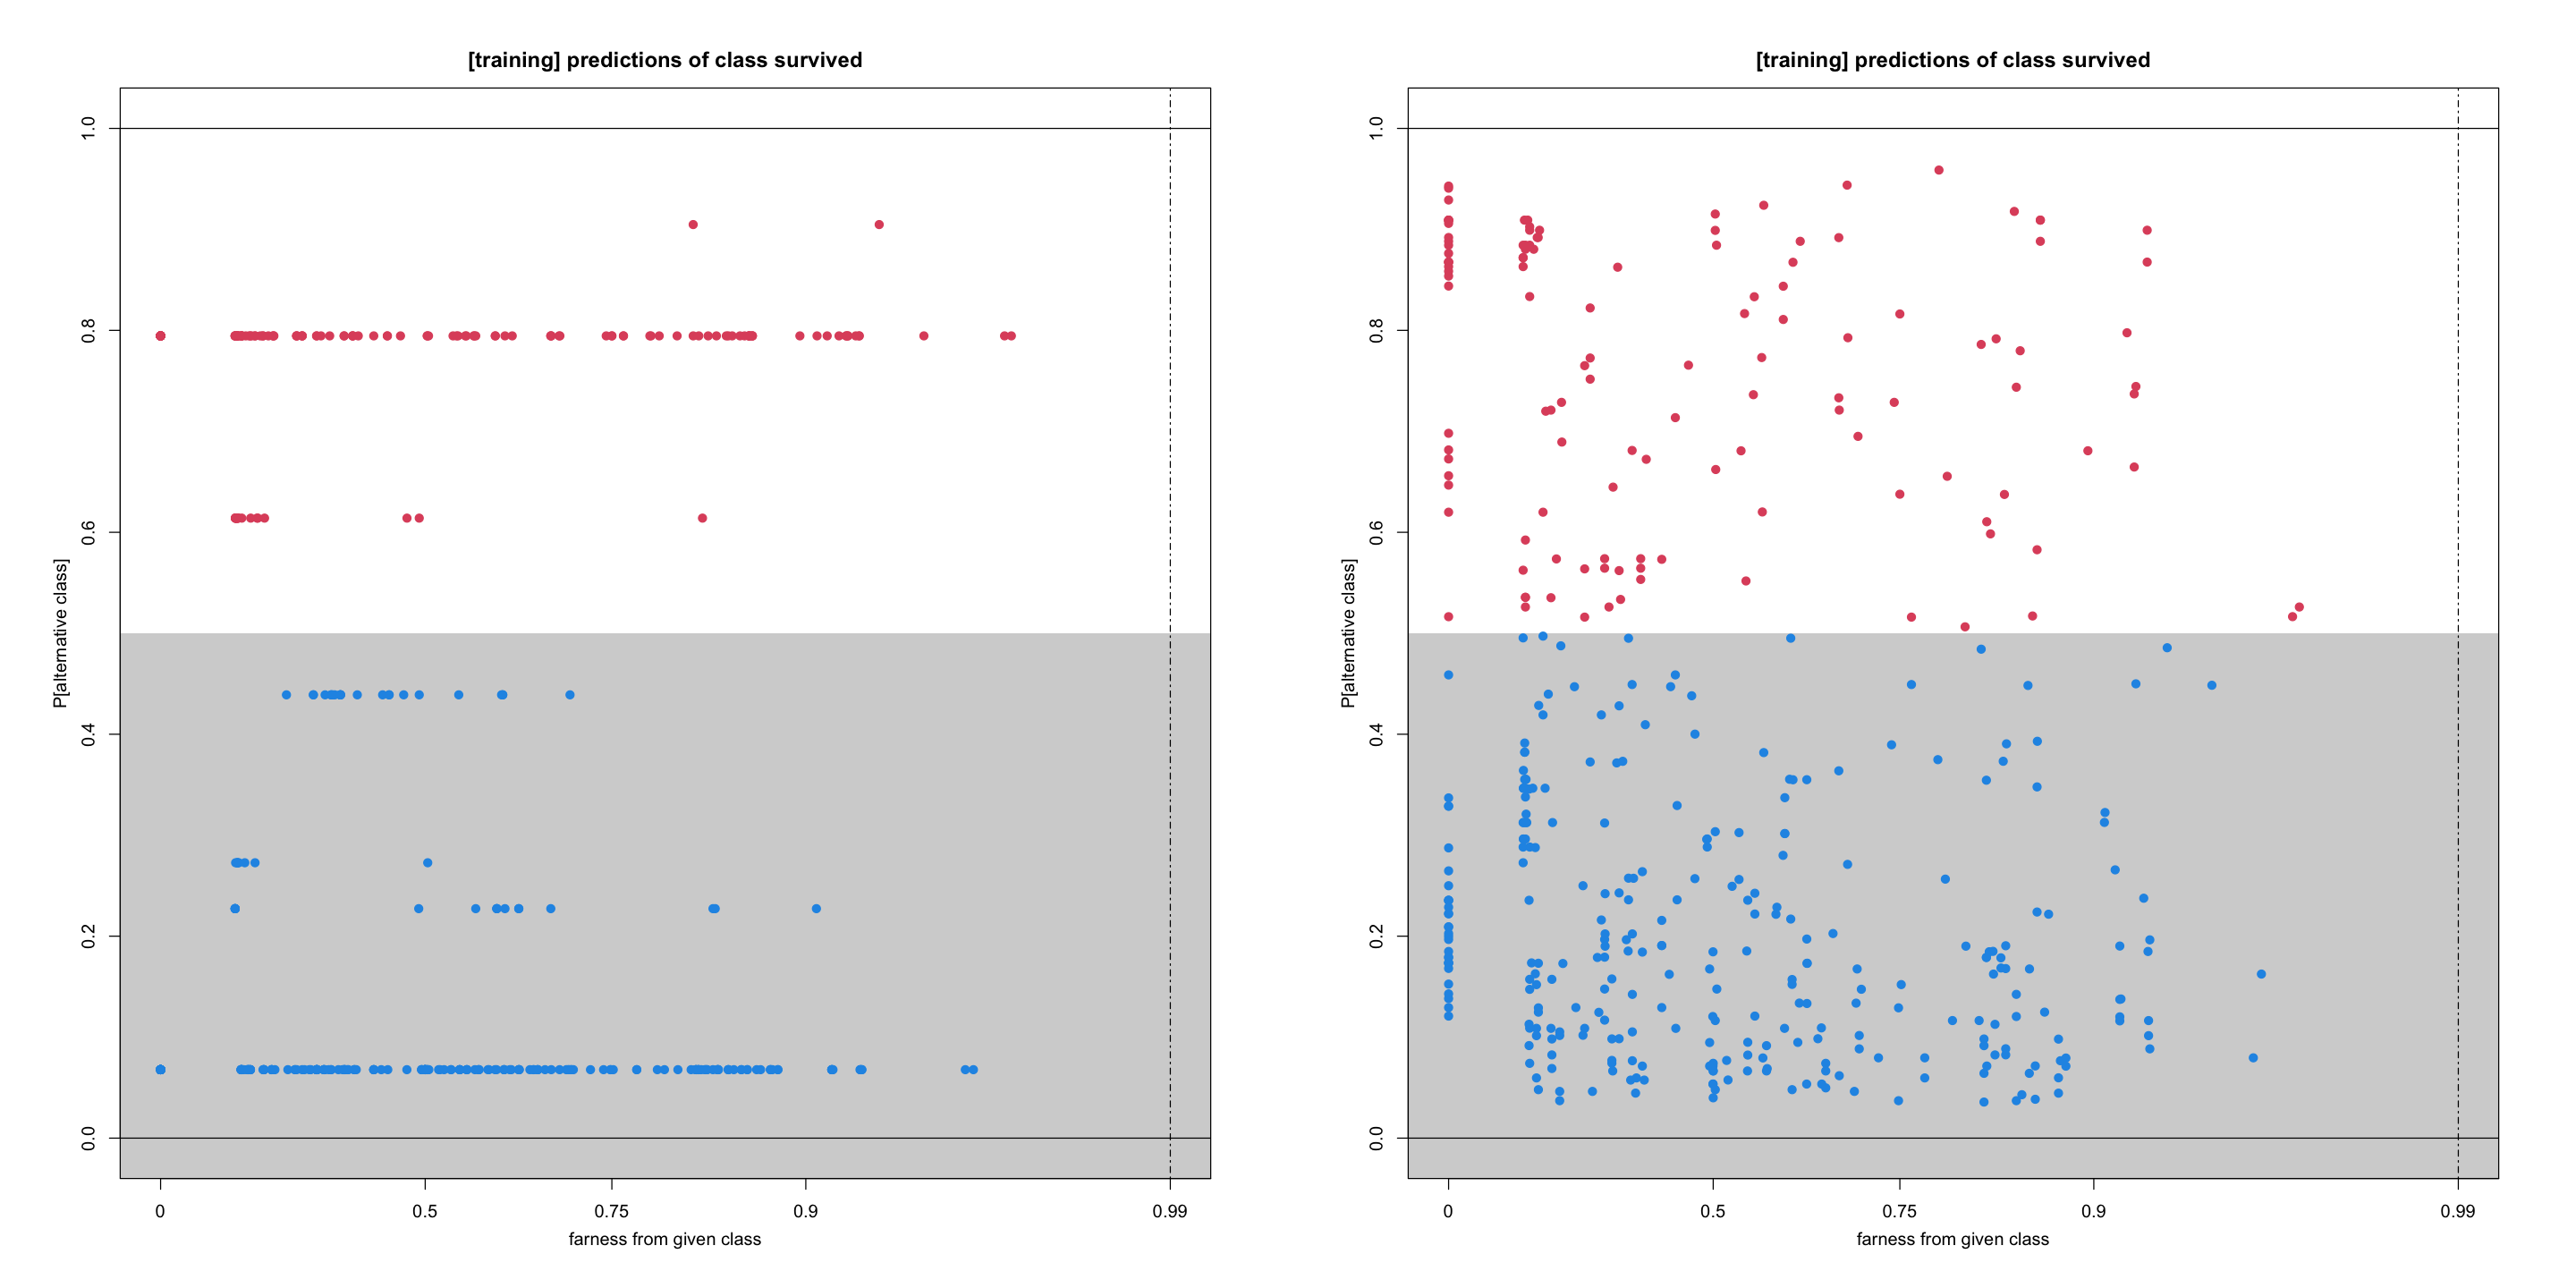

In [188]:
par(mfrow = c(1,2))
classmap(vcrtrain, "survived", classCols = c(2, 4)) # survived #casualty
classmap(vcrtrain2, "survived", classCols = c(2, 4))

Lets investigate the mis-classification for non-far observations for `casualty`. 

In [156]:
# str(vcrtrain2)

In [182]:
cas <- vcrtrain2$y=='casualty' #& vcrtrain2$farness==0
idx <- which.max(vcrtrain2$farness[cas]); idx

[1] 475

In [184]:
vcrtrain2$X[cas,][idx,]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataType
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1006,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63,1,0,PC 17483,221.7792,C55 C57,S,test


In [190]:
vcrtrain2$y[cas][idx]

[1] "casualty"

Her fate is statistically unlikely, but well-known and documented ([wiki](https://en.wikipedia.org/wiki/Ida_Straus)). 

>  _We have lived together for many years. Where you go, I go._


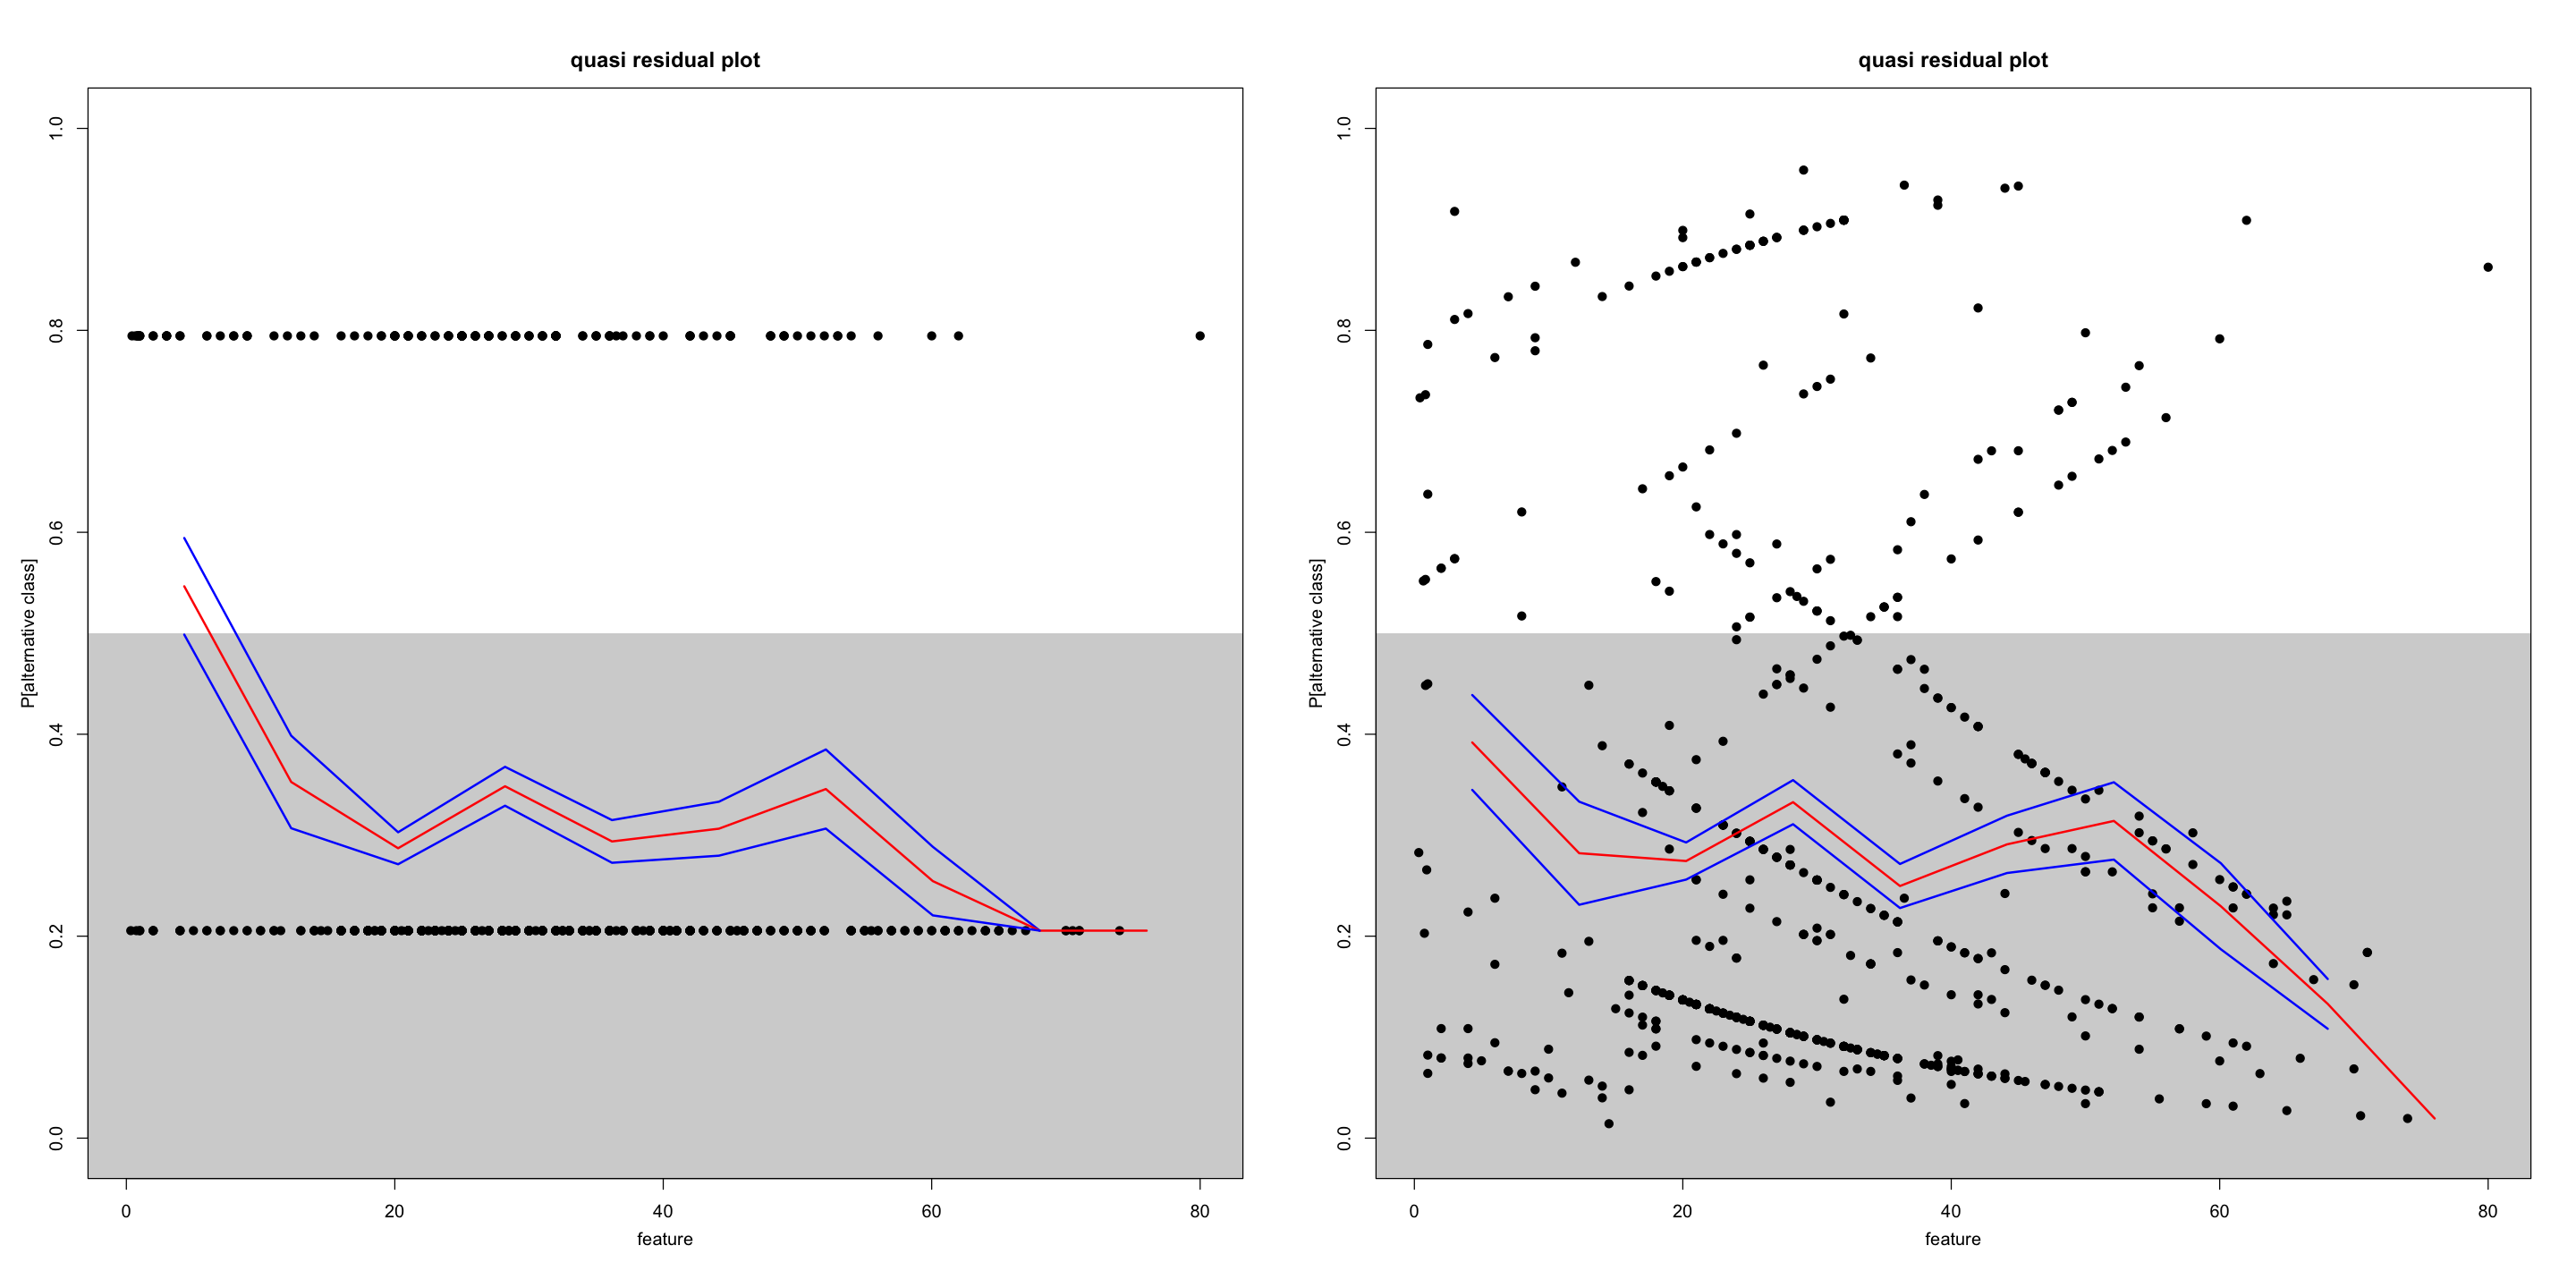

In [106]:
index = vcrtrain$X$Sex=='male'
index2 = data_titanic$Sex=='male' 
par(mfrow = c(1,2))
qresplot(vcrtrain$PAC[index], vcrtrain$X$Age[index], plotErrorBars = TRUE)
qresplot(vcrtrain2$PAC[index2], data_titanic$Age[index], plotErrorBars = TRUE)

In [111]:
require("pROC")

In [108]:
roc1 <- roc(fit$y, pred)
auc(roc1)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8454

In [109]:
head(probs <- predict(rpart.out, type = "prob")[,1])

1          2          3          4          5          7 
0.79452055 0.06779661 0.61403509 0.06779661 0.79452055 0.79452055

In [110]:
roc0 <- roc(data_titanic$y,probs)
auc(roc0)

Setting levels: control = casualty, case = survived

Setting direction: controls > cases



Area under the curve: 0.8061

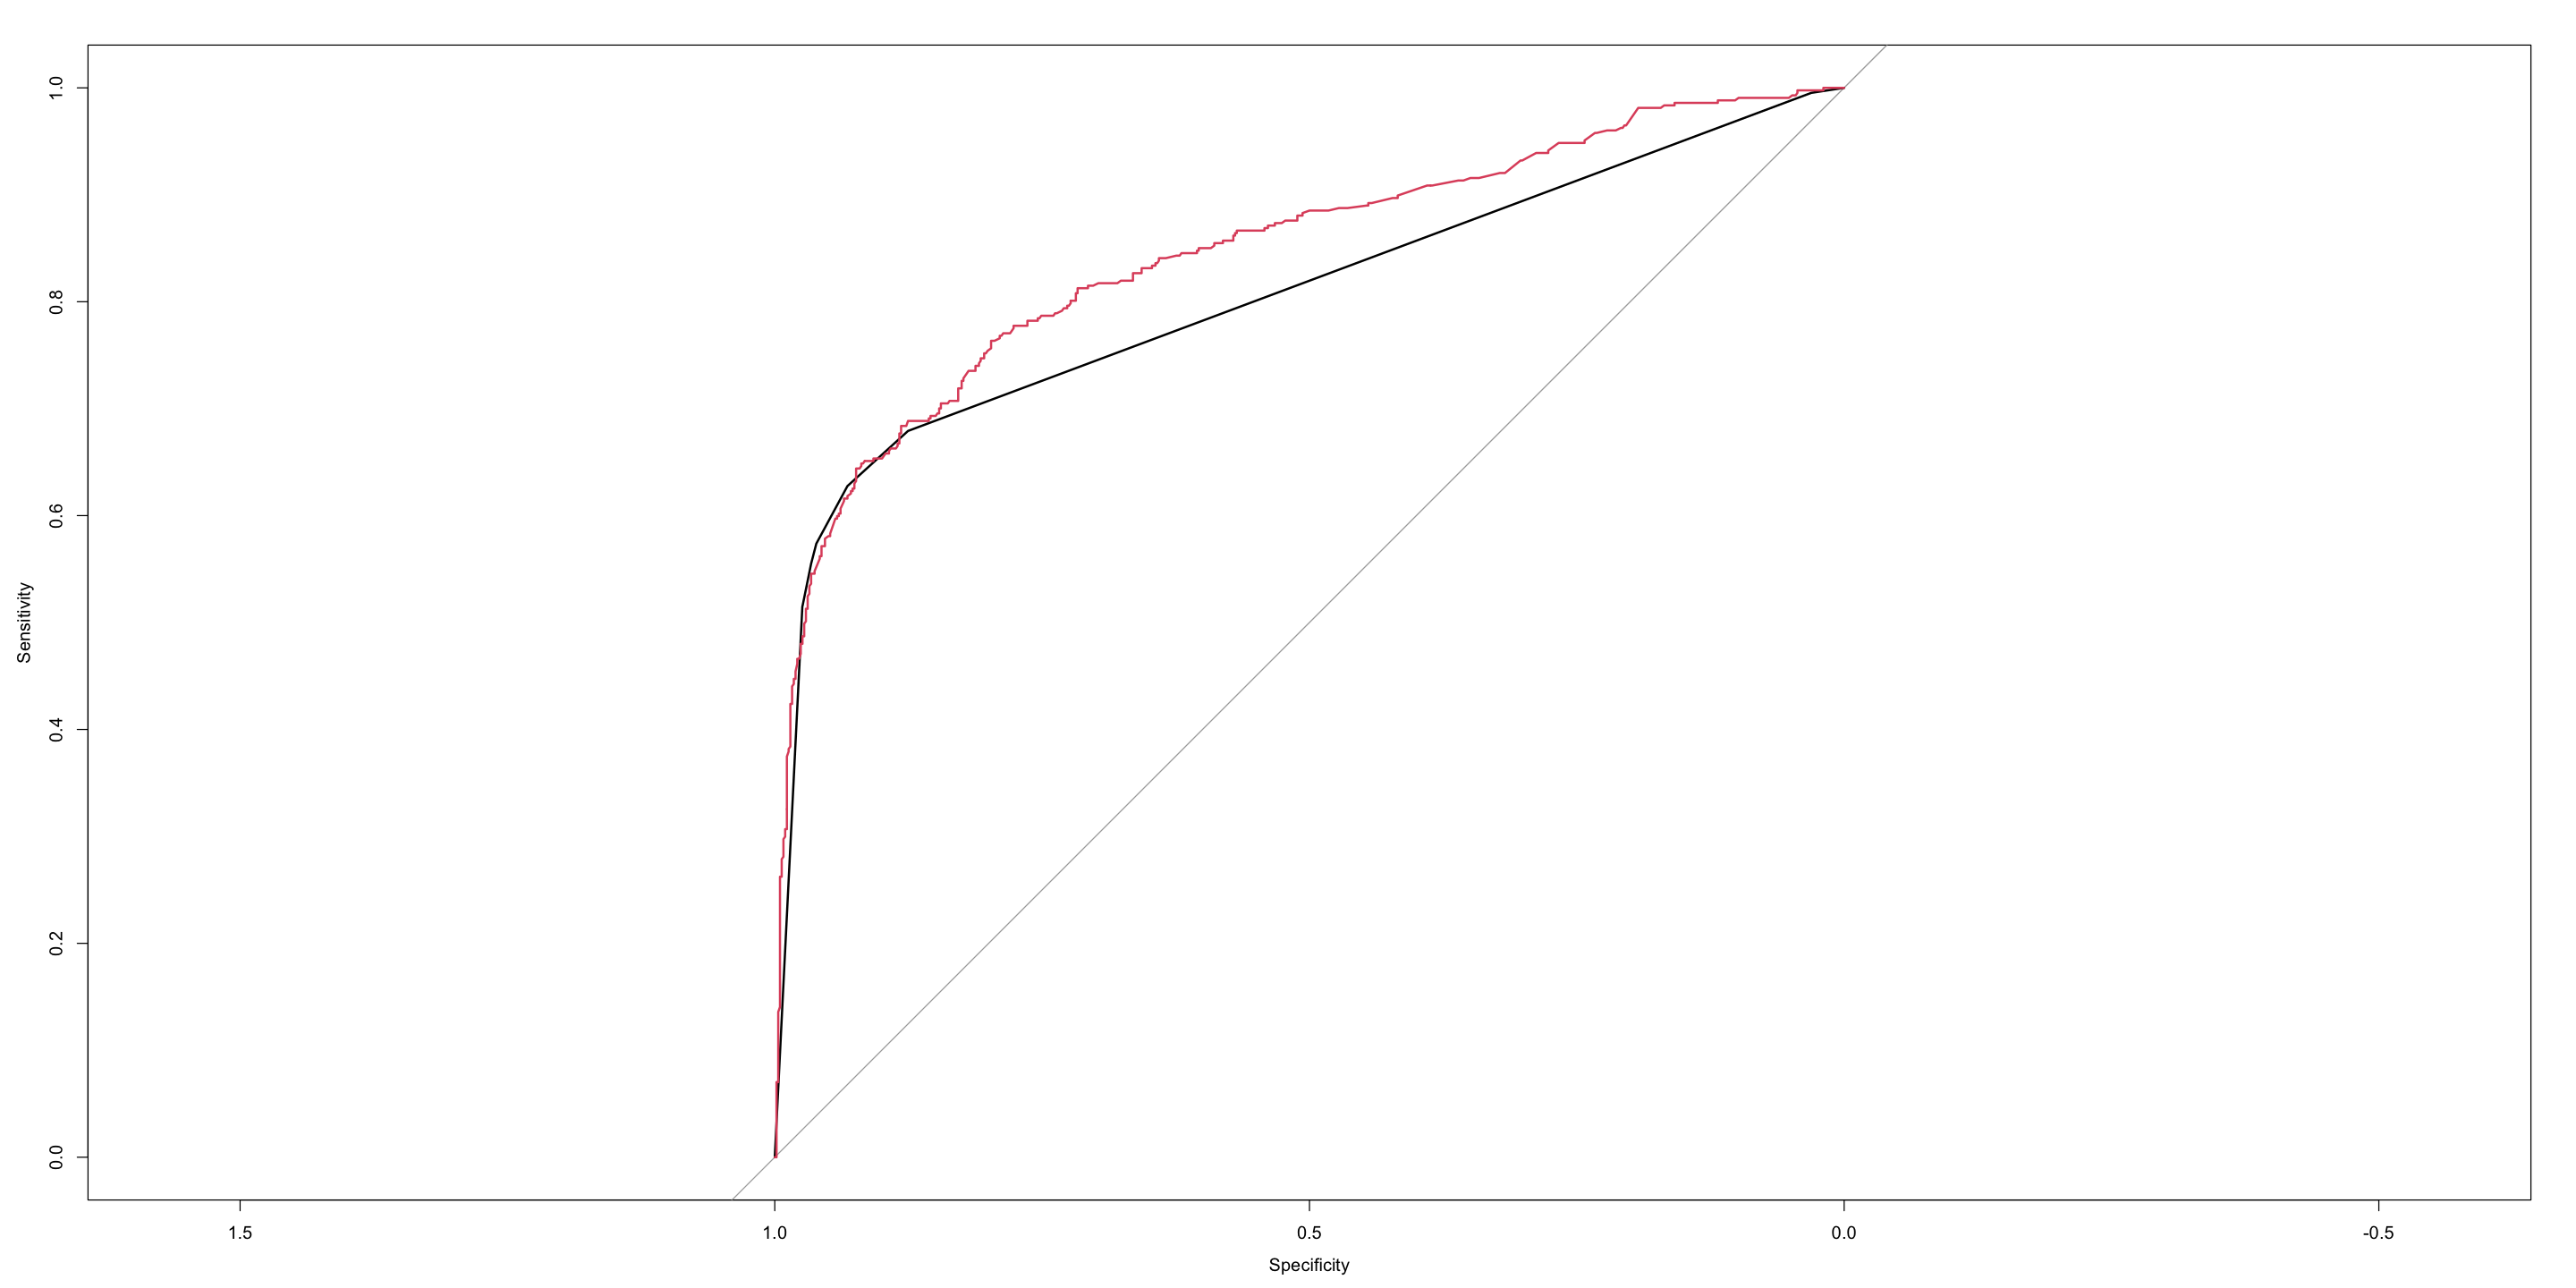

In [112]:
plot(roc0)
plot(roc1, col = 2, add = T)

### Summary

The proposed visualizations focus on the cases in a classification. The new silhouette plot describes the strength of each object’s classification, grouped by class. Quasi residual plots yield other insights, such as trends in subsets of the data like the effect of age for male passengers on the Titanic. The class map provides additional information, as it can tell us which cases lie between classes, which cases are far from their given class, and some cases maybe far from all classes. The class map allowed us to distinguish between feature noise and label noise. The displays also drew our attention to atypical cases that were inspected in more detail, providing further insights in the data. 